In [6]:
import pandas as pd
import warnings
warnings.simplefilter("ignore", category=UserWarning)
from sklearn.metrics import cohen_kappa_score
import numpy as np

In [2]:
file = "unique_sample_families.csv"
f2 = "../RQ1/must_exclude_from_all_analysis.csv"

df1 = pd.read_csv(file, encoding='latin1')
df2 = pd.read_csv(f2, encoding='latin1')

exclusion = list(df2['family'].unique())


df = df1[~df1['family'].isin(exclusion)]

manual_sync = list(df['manual_sync'])
manual_intensity = list(df['manual_intensity'])
manual_code = list(df['manual_code'])
manual_lag = list(df['manual_lag'])
manual_pattern = list(['manual_pattern'])


auto_sync = list(df['auto_syncs'])
auto_intensity = list(df['auto_intensity'])
auto_code = list(df['auto_code'])
auto_lag = list(df['auto_lag'])
auto_pattern = list(['auto_pattern_name'])

sync = cohen_kappa_score(manual_sync, auto_sync)
lag = cohen_kappa_score(manual_lag, auto_lag)
intensity = cohen_kappa_score(manual_intensity, auto_intensity)
code = cohen_kappa_score(manual_code, auto_code)
pattern = cohen_kappa_score(manual_pattern, auto_pattern)

print("The Synchronization Score is:", sync)
print("The Lag Score is:", lag)
print("The Intensity Score is:", intensity)
print("The Coding Score is:", code)
print("The Pattern Score is:", pattern)





print(df.columns)
print(len(df))

The Synchronization Score is: 0.981080189198108
The Lag Score is: 1.0
The Intensity Score is: 0.9558067831449126
The Coding Score is: 0.9557878502270585
The Pattern Score is: 0.0
Index(['owner', 'family', 'model_name', 'is_50', 'manual_sync', 'lag',
       'manual_intensity', 'code', 'manual_code', 'manual_lag',
       'manual_pattern', 'auto_lag', 'auto_syncs', 'auto_intensity',
       'auto_code', 'auto_pattern_name', 'differences'],
      dtype='object')
172


C:\Users\LabSystem\AppData\Local\Temp\ipykernel_3332\3532366099.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Lagged'] = df['Lagged'].replace({


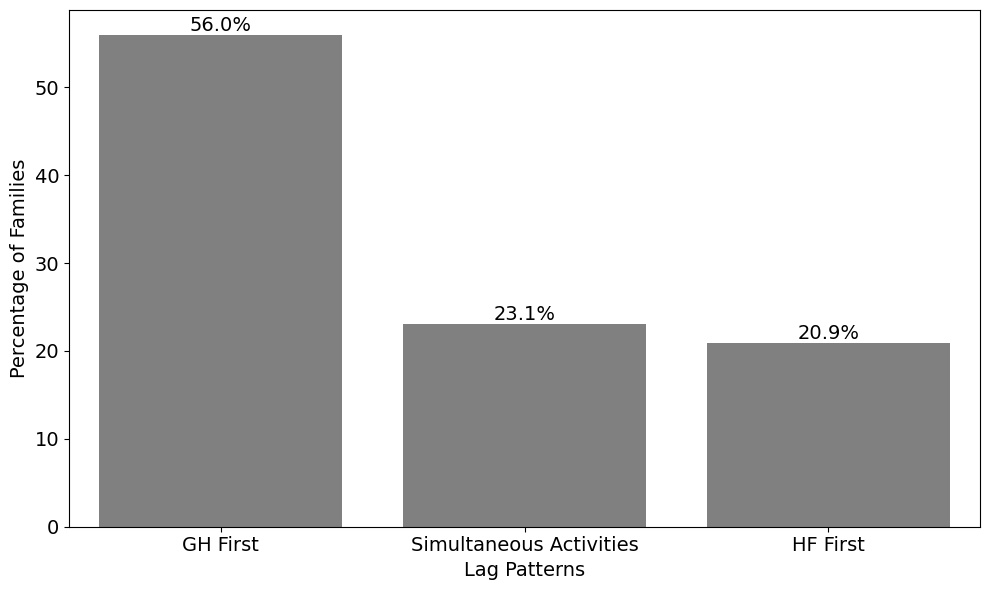

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file = "all_auto_and_manual_patterns.csv"
f2 = "../RQ1/must_exclude_from_all_analysis.csv"

df1 = pd.read_csv(file, encoding='latin1')
df2 = pd.read_csv(f2, encoding='latin1')

# Exclusion list
exclusion = list(df2['family'].unique())

# Filter out excluded families
dfs = df1[~df1['family'].isin(exclusion)]

# Prepare the dataframe
df = dfs[["family", "Lagged"]]

"""df['Lagged'] = df['Lagged'].replace({
    'Upstream First': 'Upstream First',
    'Downstream First': 'Downstream First',
    'No Lag': 'Simultaneous Usage'
})"""


df['Lagged'] = df['Lagged'].replace({
    'Upstream First': 'GH First',
    'Downstream First': 'HF First',
    'No Lag': 'Simultaneous Activities'
})


# Calculate the count of families for each 'Lagged' category
lagged_counts = df['Lagged'].value_counts().reset_index()
lagged_counts.columns = ['Lagged', 'Family Count']

# Calculate percentages for each category
lagged_counts['Percentage'] = (lagged_counts['Family Count'] / lagged_counts['Family Count'].sum()) * 100

# Create the bar plot using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Lagged', y='Percentage', data=lagged_counts, color='gray')

# Add percentage labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="edge", fontsize=14)

# Set the title and labels with font size 14
#plt.title("Distribution of Lagged Families", fontsize=14)
plt.xlabel("Lag Patterns", fontsize=14)
plt.ylabel("Percentage of Families", fontsize=14)

# Adjust font size for ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Save the figure as a PDF
plt.tight_layout()
plt.savefig("lagged_pattern.pdf", bbox_inches='tight')

# Show the plot
plt.show()


C:\Users\LabSystem\AppData\Local\Temp\ipykernel_15088\2722808335.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['names'] = dfs['names'].replace(name_mapping)


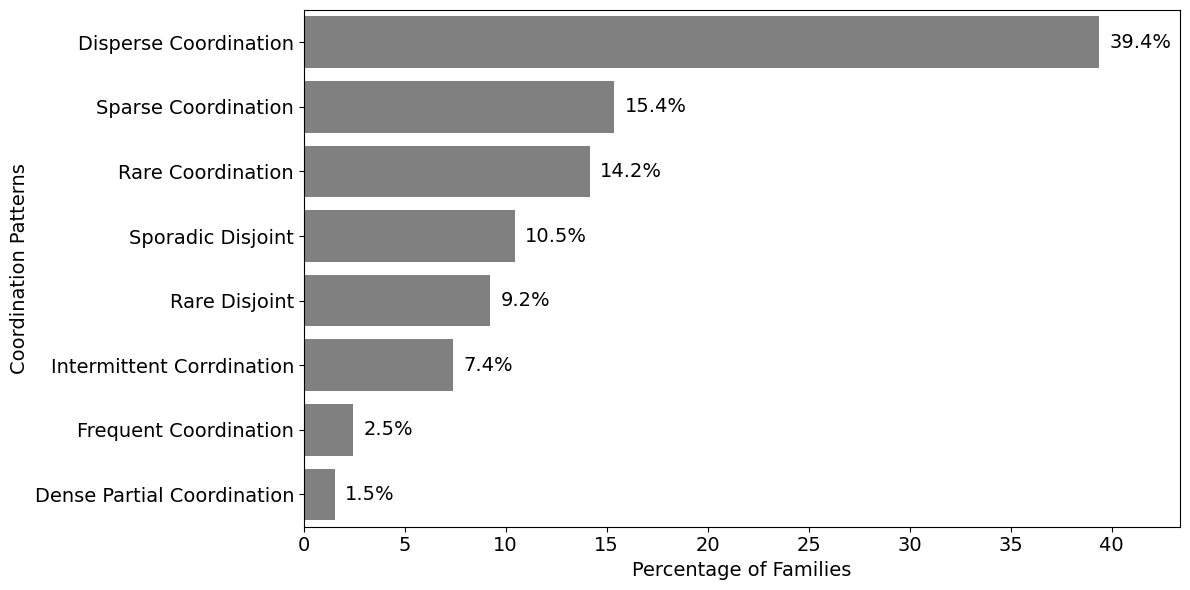

Bar chart saved as sync_pattern.pdf


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file = "all_auto_and_manual_patterns.csv"
f2 = "../RQ1/must_exclude_from_all_analysis.csv"

df1 = pd.read_csv(file, encoding='latin1')
df2 = pd.read_csv(f2, encoding='latin1')

# Exclude specific families
exclusion = list(df2['family'].unique())
dfs = df1[~df1['family'].isin(exclusion)]

# Replace 'Dispersed Alignment' with 'Disperse Alignment'
#dfs['names'] = dfs['names'].replace('Dispersed Alignment', 'Disperse Alignment')

name_mapping = {
    'Rare Disjoing': 'Rare Disjoint',
    'Frequent Alignment': 'Frequent Coordination',
    'Intermittent Alignment': 'Intermittent Corrdination',
    'Rare Alignment': 'Rare Coordination',
    'Sparse Alignment': 'Sparse Coordination',
    'Dispersed Alignment': 'Disperse Coordination',
    'Dense Partial Alignment': 'Dense Partial Coordination'
}

dfs['names'] = dfs['names'].replace(name_mapping)


# Data preparation
df = dfs[["family", "names"]]
name_family_count = df.groupby('names')['family'].nunique()
total_families = len(df['family'].unique())  # Total number of unique families

# Calculate the percentage of families involved for each name
percentage = (name_family_count / total_families) * 100

# Prepare data for plotting and sort by percentage
plot_data = pd.DataFrame({
    'names': name_family_count.index,
    'percentage': percentage
})

# Sort the data by 'percentage' in ascending order
plot_data = plot_data.sort_values('percentage', ascending=False)

# Create a seaborn barplot with custom color (gray bars)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='percentage', y='names', data=plot_data, color='gray')

# Add percentages on top of the bars, with a slight offset for better positioning
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.5, p.get_y() + p.get_height() / 2, f'{width:.1f}%', ha='left', va='center', fontsize=14)

# Set x-axis limit to make sure percentages fit within the plot area
plt.xlim(0, max(percentage) + 4)

# Set labels and title with font size 14
ax.set_xlabel('Percentage of Families', fontsize=14)
ax.set_ylabel('Coordination Patterns', fontsize=14)

# Set font size for ticks
plt.tick_params(axis='both', which='major', labelsize=14)

# Save the plot
plt.tight_layout()
plt.savefig("sync_pattern.pdf", bbox_inches='tight')

# Show the plot
plt.show()

print("Bar chart saved as sync_pattern.pdf")


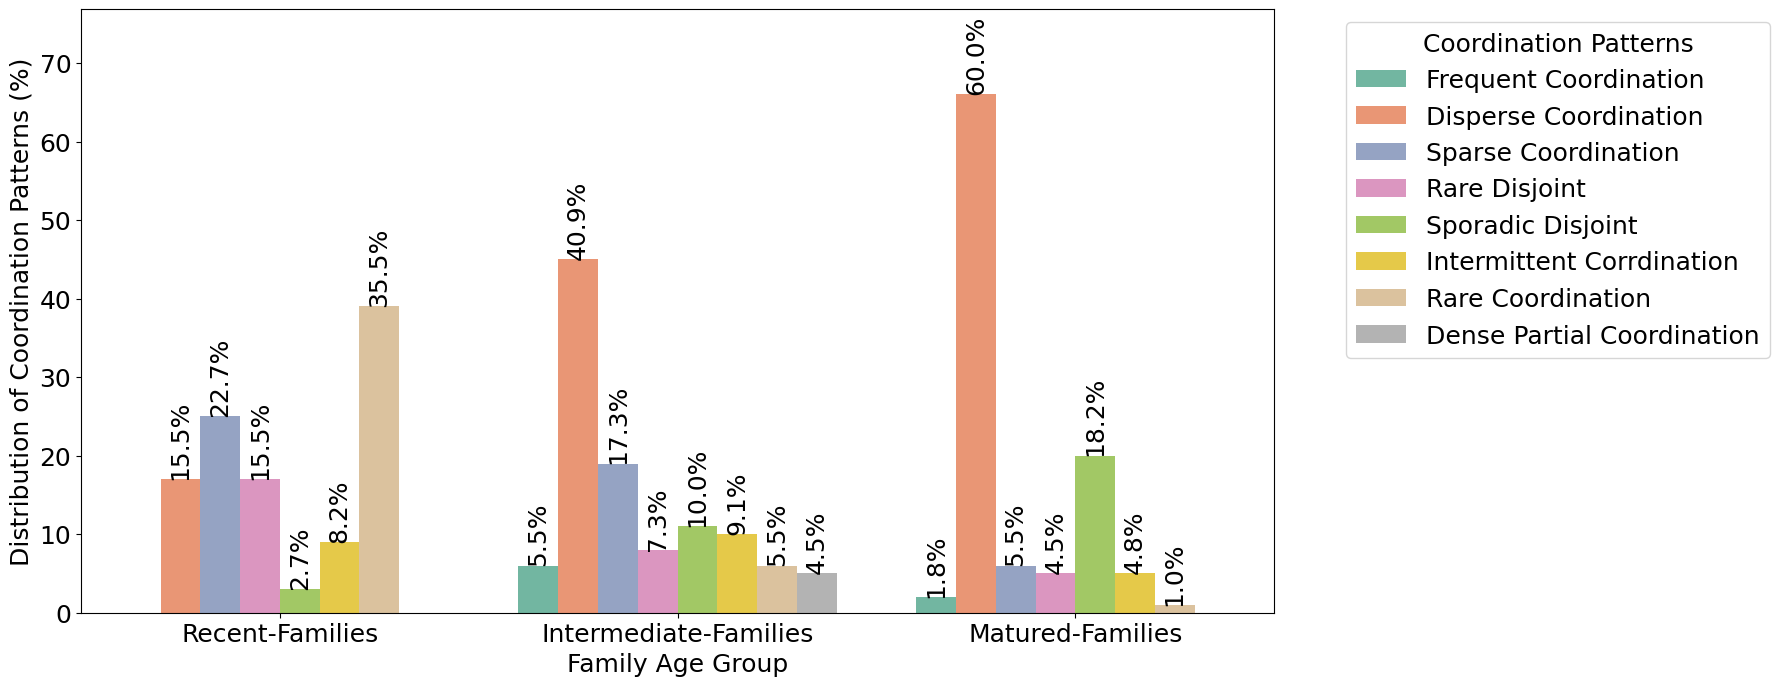

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file = "grouped_data_RQ2.csv"
f2 = "../RQ1/must_exclude_from_all_analysis.csv"

df1 = pd.read_csv(file, encoding='latin1')
df2 = pd.read_csv(f2, encoding='latin1')

# Exclude specific families
exclusion = list(df2['family'].unique())
df = df1[~df1['family'].isin(exclusion)]

# Rename 'Lagged' values for clarity
df['Lagged'] = df['Lagged'].replace({
    'Upstream First': 'GitHub First',
    'Downstream First': 'Hugging Face First',
    'No Lag': 'Simultaneous'
})

name_mapping = {
    'Rare Disjoing': 'Rare Disjoint',
    'Frequent Alignment': 'Frequent Coordination',
    'Intermittent Alignment': 'Intermittent Corrdination',
    'Rare Alignment': 'Rare Coordination',
    'Sparse Alignment': 'Sparse Coordination',
    'Dispersed Alignment': 'Disperse Coordination',
    'Dense Partial Alignment': 'Dense Partial Coordination'
}

df['names'] = df['names'].replace(name_mapping)

# Define age group order
category_order = ["Recent-Families", "Intermediate-Families", "Matured-Families"]

# Count occurrences of each 'names' category in each 'age_group'
age_group_counts = df.groupby(['age_group', 'names']).size().reset_index(name='count')

# Calculate total count per age_group for percentage calculation
age_group_totals = df['age_group'].value_counts().reset_index(name='total')
age_group_totals.columns = ['age_group', 'total']

# Merge counts with totals to calculate percentages
age_group_counts = pd.merge(age_group_counts, age_group_totals, on='age_group')
age_group_counts['percentage'] = (age_group_counts['count'] / age_group_counts['total']) * 100

# Find max percentage for setting ylim
max_percentage = age_group_counts['percentage'].max()

# Create the countplot using Seaborn
plt.figure(figsize=(18, 7))
ax = sns.countplot(data=df, x="age_group", hue="names", palette="Set2", order=category_order)

# Set y-axis limit
plt.ylim(0, max_percentage + 14)  # Adjusted based on actual percentages

# Annotate bars with percentages
for p in ax.patches:
    height = p.get_height()
    age_group = category_order[int(p.get_x())]  # Get the age group
    total_count = age_group_totals[age_group_totals['age_group'] == age_group]['total'].values[0]
    
    if height > 0 and total_count > 0:
        percentage = (height / total_count) * 100  # Calculate per age group
        ax.annotate(f'{percentage:.1f}%', 
                    (p.get_x() + p.get_width() / 2, height),  
                    ha="center", va="bottom", fontsize=18, rotation=90)  # Rotated to 90 degrees

# Set labels and font sizes
plt.xlabel('Family Age Group', fontsize=18)
plt.ylabel('Distribution of Coordination Patterns (%)', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(title='Coordination Patterns', title_fontsize=18, fontsize=18, bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig("RQ2.3.1b.pdf", bbox_inches='tight')
plt.show()


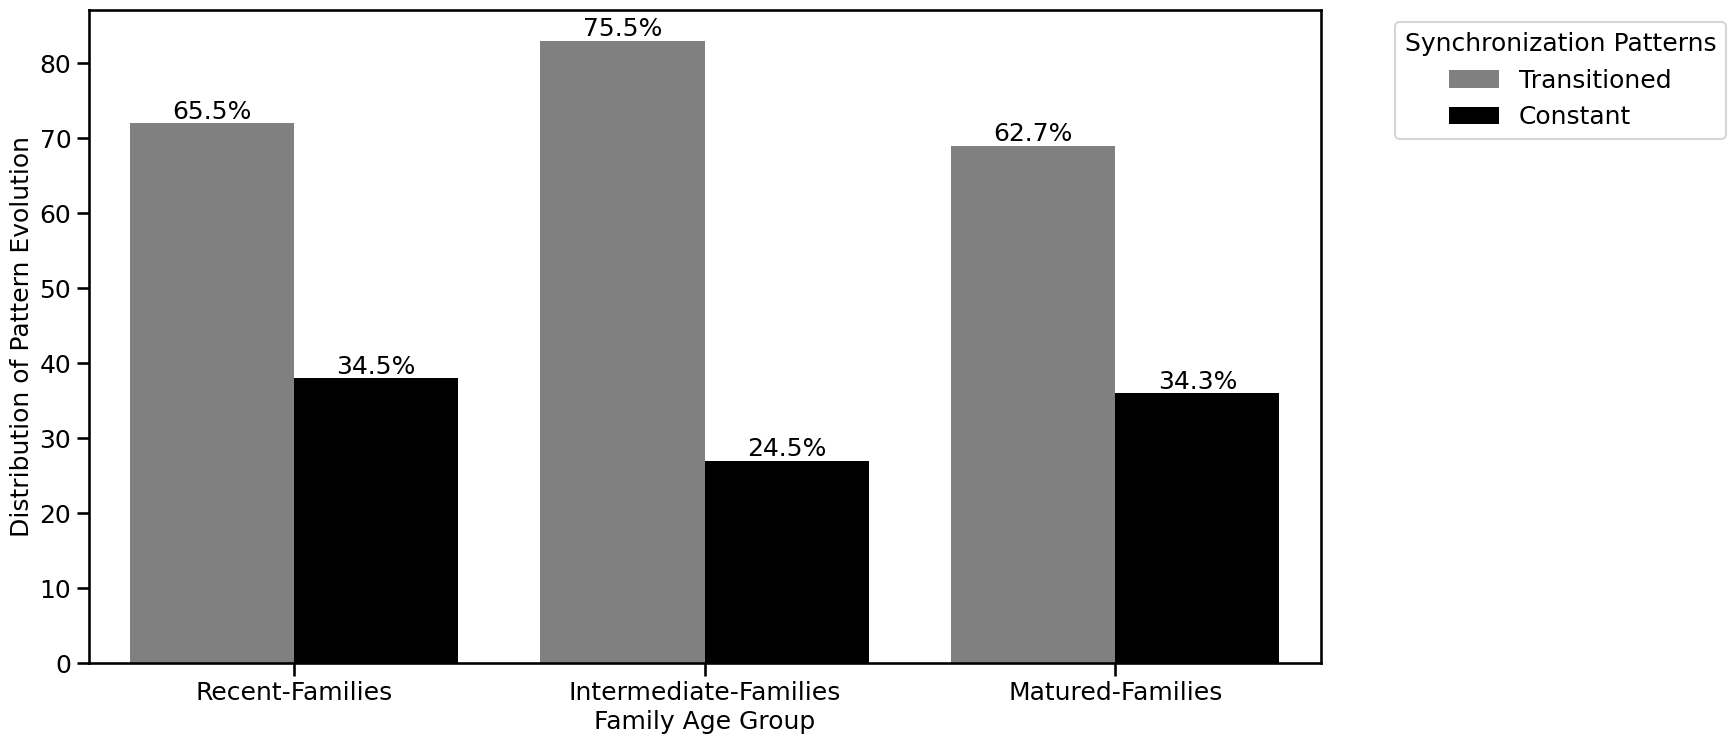

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set global font size using rcParams and Seaborn context
plt.rc('font', size=14)
sns.set_context("talk", font_scale=1.4)

# Load the dataset
file = "RQ2_early_late_pattern.csv"
file2 = "grouped_data_RQ2.csv"
f2 = "../RQ1/must_exclude_from_all_analysis.csv"

df_prime = pd.read_csv(file, encoding='latin1')
df2_prime = pd.read_csv(file2, encoding='latin1')
dfs2 = pd.read_csv(f2, encoding='latin1')

exclusion = list(dfs2['family'].unique())

df1 = df_prime[~df_prime['family'].isin(exclusion)]
df2 = df2_prime[~df2_prime['family'].isin(exclusion)]

# Group families by age group
family = df2.groupby('family').agg({
    'age_group': lambda x: ",".join(map(str, x.unique())),
}).reset_index()

# Merge datasets
comb = pd.merge(df1, family, on='family', how='inner')

# Calculate transition and pattern change
comb["transition"] = comb["early_pattern"] + " → " + comb["late_pattern"]
comb["pattern_change"] = comb.apply(lambda row: "Constant" if row["early_pattern"] == row["late_pattern"] else "Transitioned", axis=1)

# Define age group order
category_order = ["Recent-Families", "Intermediate-Families", "Matured-Families"]

# Calculate evolution rate per age group
evolution_rates = (
    comb.groupby("age_group")["pattern_change"]
    .apply(lambda x: (x == "Transitioned").sum() / len(x) * 100)
    .reindex(category_order)
)

# Plot pattern change distribution with percentages
grey_palette = ["#808080", "#000000"]
plt.figure(figsize=(18, 8))
ax = sns.countplot(data=comb, x="age_group", hue="pattern_change", palette=grey_palette, order=category_order)

# Increase font size for specific elements explicitly (if needed)
plt.xlabel('Family Age Group', fontsize=18)
plt.ylabel('Distribution of Pattern Evolution', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(title='Synchronization Patterns', fontsize=18, title_fontsize=18, bbox_to_anchor=(1.05, 1), loc='upper left')

# Add percentages to the bars
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        total_count = comb[comb["age_group"] == category_order[int(p.get_x())]].shape[0]
        percentage = (height / total_count) * 100 if total_count > 0 else 0
        ax.annotate(f'{percentage:.1f}%',
                    (p.get_x() + p.get_width() / 2., height),
                    ha="center", va="bottom", fontsize=18)

# Show plot with tight layout and save it as PDF
plt.tight_layout()
plt.savefig("RQ2.3.1c.pdf")
plt.show()


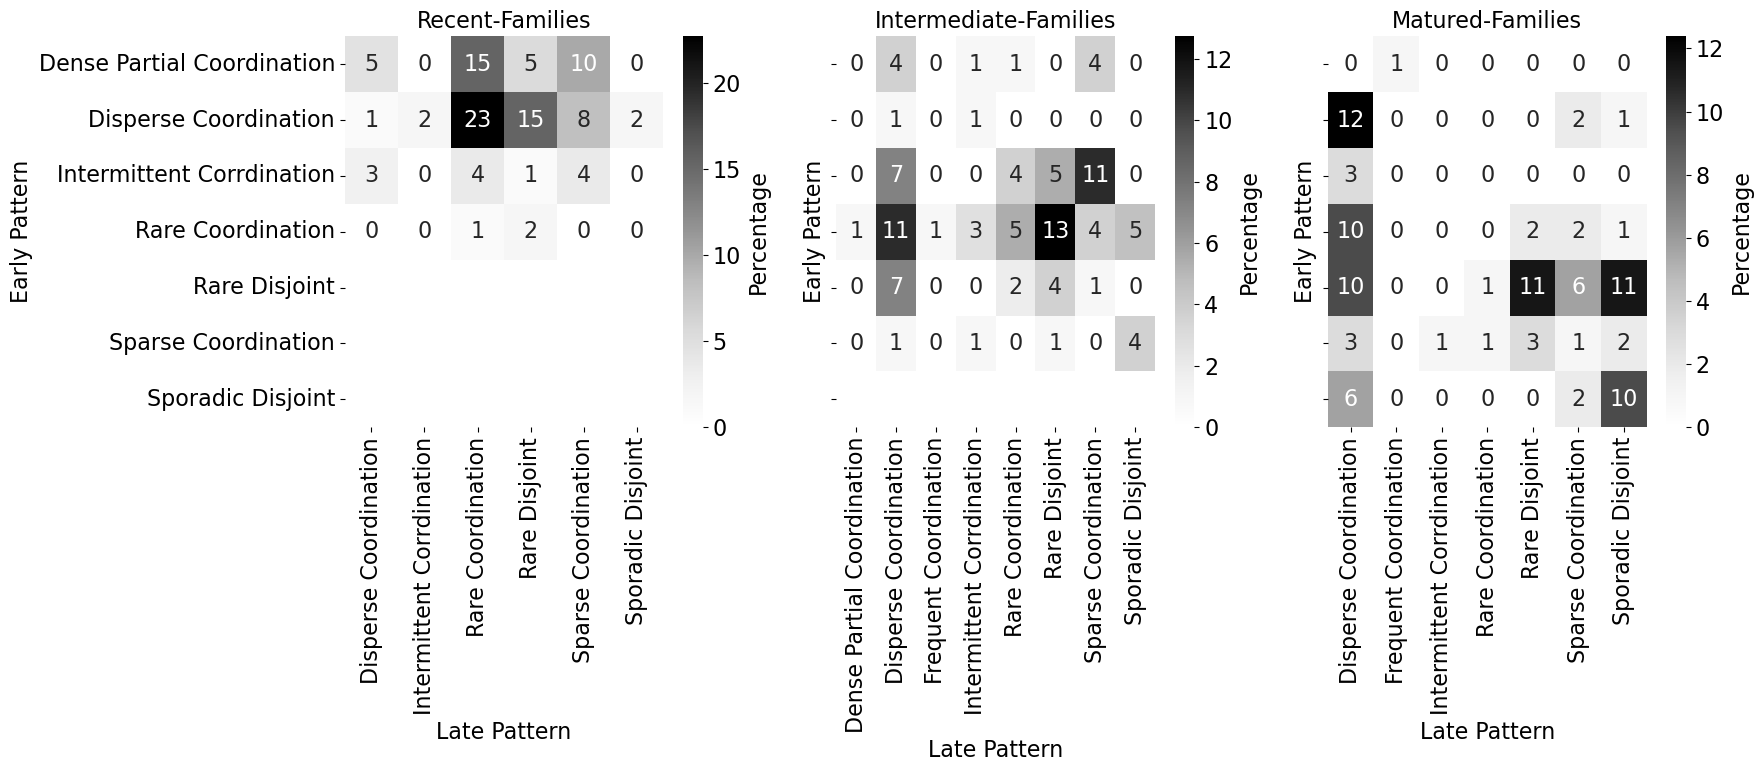

,owner,family,early_lagged,late_lagged,early_sync,late_sync,early_intensity,late_intensity,early_codes,late_codes,early_pattern,late_pattern,model_name,age_group
0,01-ai,01-ai_YI,No Lag,No Lag,CS,CS,F,S,CSF,CSS,Frequent Coordination,Intermittent Corrdination,9,Intermediate-Families
1,1-800-BAD-CODE,1-800-BAD-CODE_XLM-ROBERTA,Upstream First,Downstream First,AS,AS,R,S,ASR,ASS,Rare Disjoint,Sporadic Disjoint,1,Recent-Families
2,42dot,42dot_42DOT-LLM,No Lag,Upstream First,PS,AS,R,R,PSR,ASR,Sparse Coordination,Rare Disjoint,1,Intermediate-Families
3,af1tang,af1tang_PERSONALGPT,Upstream First,Upstream First,AS,AS,R,R,ASR,ASR,Rare Disjoint,Rare Disjoint,1,Matured-Families
4,ai-forever,ai-forever_gpt,No Lag,Upstream First,PS,PS,S,R,PSS,PSR,Disperse Coordination,Sparse Coordination,5,Matured-Families
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,wxjiao,wxjiao_alpaca,No Lag,No Lag,CS,CS,R,R,CSR,CSR,Rare Coordination,Rare Coordination,1,Recent-Families
321,xlnet,xlnet_xlnet,No Lag,Upstream First,PS,AS,S,S,PSS,ASS,Disperse Coordination,Sporadic Disjoint,2,Matured-Families
322,yahma,yahma_llama,Upstream First,Upstream First,AS,CS,R,R,ASR,CSR,Rare Disjoint,Rare Coordination,1,Recent-Families
323,yangheng,yangheng_absa-model,Upstream First,Upstream First,AS,AS,R,S,ASR,ASS,Rare Disjoint,Sporadic Disjoint,1,Matured-Families


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set global font size
plt.rcParams.update({'font.size': 16})

# Load the dataset
file = "RQ2_early_late_pattern.csv"
file2 = "grouped_data_RQ2.csv"
f2 = "../RQ1/must_exclude_from_all_analysis.csv"

df_prime = pd.read_csv(file, encoding='latin1')
df2_prime = pd.read_csv(file2, encoding='latin1')
dfs2 = pd.read_csv(f2, encoding='latin1')

exclusion = list(dfs2['family'].unique())

df = df_prime[~df_prime['family'].isin(exclusion)]
df2 = df2_prime[~df2_prime['family'].isin(exclusion)]

# Group families by age group
family = df2.groupby('family').agg({
    'age_group': lambda x: ",".join(map(str, x.unique())),
}).reset_index()

# Merge datasets
comb = pd.merge(df, family, on='family', how='inner')

name_mapping = {
    'Rare disjoint pattern': 'Rare Disjoint',
    'Frequent Alignment Pattern': 'Frequent Coordination',
    'Intermittent Alignment Pattern': 'Intermittent Corrdination',
    'Rare Alignment Pattern': 'Rare Coordination',
    'Sparse Alignment Pattern': 'Sparse Coordination',
    'Dispersed Alignment Pattern': 'Disperse Coordination',
    'Dense Partial Alignment Pattern': 'Dense Partial Coordination',
    'Sporadic Disjoint Pattern': 'Sporadic Disjoint'
}
comb['early_pattern'] = comb['early_pattern'].replace(name_mapping)
comb['late_pattern'] = comb['late_pattern'].replace(name_mapping)

# Define age group categories
category_order = ["Recent-Families", "Intermediate-Families", "Matured-Families"]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 8), sharey=True)

# Name mapping


# Loop through age groups
for ax, age_group in zip(axes, category_order):
    group_data = comb[comb['age_group'] == age_group].copy()
    
    group_data['early_pattern'] = group_data['early_pattern'].replace(name_mapping)
    group_data['late_pattern'] = group_data['late_pattern'].replace(name_mapping)

    transition_matrix = pd.crosstab(
        group_data['early_pattern'], group_data['late_pattern']
    ).fillna(0)

    transition_matrix_percentage = (transition_matrix / transition_matrix.sum().sum()) * 100

    # Heatmap
    sns.heatmap(
        transition_matrix_percentage,
        annot=True, fmt=".0f", cmap="Greys", cbar=True,
        ax=ax, annot_kws={"size": 16}
    )

    # Titles and labels
    ax.set_title(f"{age_group}", fontsize=16)
    ax.set_xlabel("Late Pattern", fontsize=16)
    ax.set_ylabel("Early Pattern", fontsize=16)
    ax.tick_params(axis='both', labelsize=16)

    # Colorbar formatting
    if ax.collections:
        cbar = ax.collections[0].colorbar
        cbar.ax.tick_params(labelsize=16)
        cbar.set_label("Percentage", fontsize=16)

# Adjust layout and save
plt.tight_layout()
plt.savefig("RQ2.3.1d.pdf")
plt.show()

comb


In [8]:
file = "RQ2_early_late_pattern.csv"
file2 = "grouped_data_RQ2.csv"
f2 = "../RQ1/must_exclude_from_all_analysis.csv"

gh = "../RQ1/GH_data_devil.csv"
hf = "../RQ1//HF_data_devil.csv"


df_prime = pd.read_csv(file, encoding='latin1')
df2_prime = pd.read_csv(file2, encoding='latin1')
dfs2 = pd.read_csv(f2, encoding='latin1')

df_gh = pd.read_csv(gh, encoding='latin1')
df_hf = pd.read_csv(hf, encoding='latin1')

exclusion = list(dfs2['family'].unique())

df1 = df_prime[~df_prime['family'].isin(exclusion)]
df2 = df2_prime[~df2_prime['family'].isin(exclusion)]

C:\Users\LabSystem\AppData\Local\Temp\ipykernel_3332\716143072.py:13: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_gh = pd.read_csv(gh, encoding='latin1')


In [9]:
# Group families by age group
family = df2.groupby('family').agg({
    'age_group': lambda x: ",".join(map(str, x.unique())),
}).reset_index()

# Merge datasets
comb = pd.merge(df1, family, on='family', how='inner')

# Calculate transition and pattern change
comb["transition"] = comb["early_pattern"] + " → " + comb["late_pattern"]
comb["pattern_change"] = comb.apply(lambda row: "Constant" if row["early_pattern"] == row["late_pattern"] else "Transitioned", axis=1)

main_df = comb[comb["pattern_change"] == "Transitioned"]

In [10]:
inclusion = list(main_df['family'].unique())

GH = df_gh[df_gh['family'].isin(inclusion)]
HF = df_hf[df_hf['family'].isin(inclusion)]

GH_data = GH[["family", "commit_message", "age_group", "author_username"]]
HF_data = HF[["family", "combined", "age_group", "author"]]

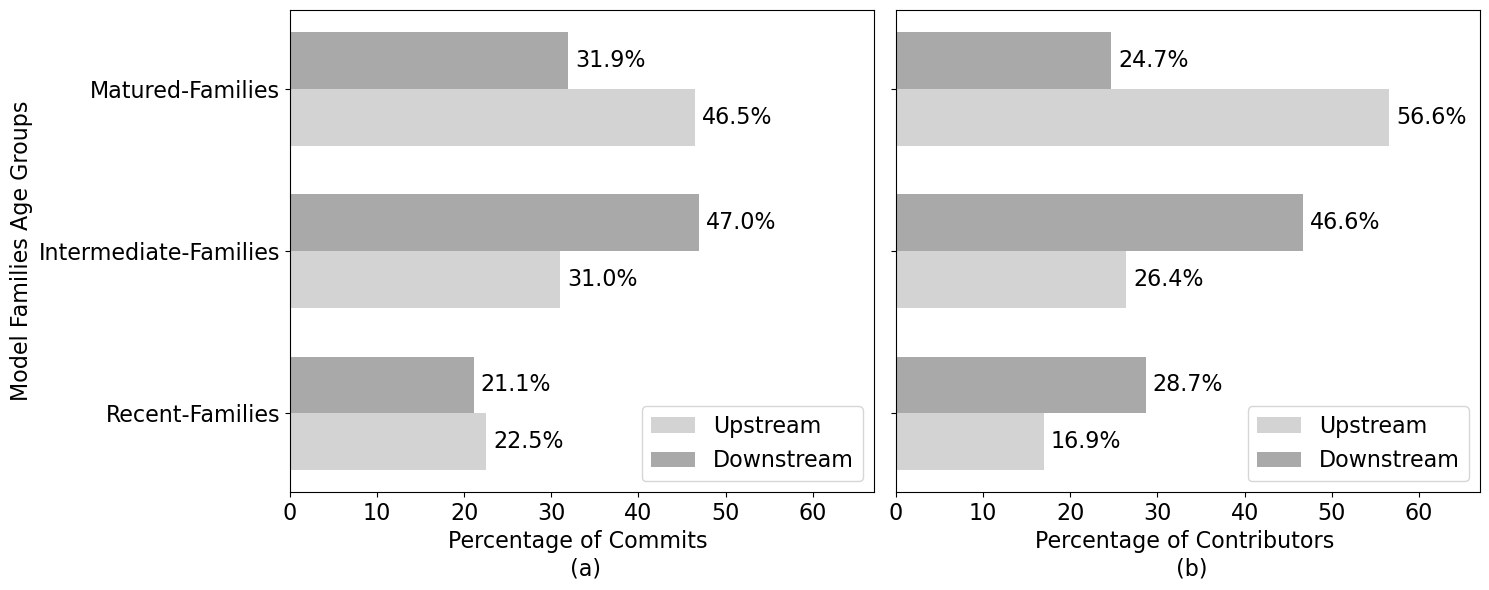

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

inclusion = list(main_df['family'].unique())

GH = df_gh[df_gh['family'].isin(inclusion)]
HF = df_hf[df_hf['family'].isin(inclusion)]

GH_data = GH[["family", "commit_message", "age_group", "author_username"]]
HF_data = HF[["family", "combined", "age_group", "author"]]

# Prepare data for commits
gh_commits = GH_data.groupby('age_group')['commit_message'].count()
hf_commits = HF_data.groupby('age_group')['combined'].count()

# Convert to percentages
gh_commits_pct = gh_commits / gh_commits.sum() * 100
hf_commits_pct = hf_commits / hf_commits.sum() * 100

# Prepare data for authors
gh_authors = GH_data.groupby('age_group')['author_username'].nunique()
hf_authors = HF_data.groupby('age_group')['author'].nunique()

# Convert to percentages
gh_authors_pct = gh_authors / gh_authors.sum() * 100
hf_authors_pct = hf_authors / hf_authors.sum() * 100

# Set up the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Define age groups and positions for bars
age_groups = ['Recent-Families', 'Intermediate-Families', 'Matured-Families']
y = np.arange(len(age_groups))
height = 0.35

# Function to add value labels for horizontal bars
def add_value_labels_horizontal(ax, bars, font_size):
    for bar in bars:
        width = bar.get_width()
        ax.annotate(f'{width:.1f}%',
                    xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(5, 0),  # 5 points horizontal offset
                    textcoords="offset points",
                    ha='left', va='center', fontsize=font_size)

# Font size for all text elements
font_size = 16

# Plot commits
bars1 = ax1.barh(y - height/2, [gh_commits_pct.get(ag, 0) for ag in age_groups], height, label='Upstream', color='lightgray')
bars2 = ax1.barh(y + height/2, [hf_commits_pct.get(ag, 0) for ag in age_groups], height, label='Downstream', color='darkgray')

add_value_labels_horizontal(ax1, bars1, font_size)
add_value_labels_horizontal(ax1, bars2, font_size)

ax1.set_xlabel('Percentage of Commits \n (a)', fontsize=font_size)
ax1.set_yticks(y)
ax1.set_yticklabels(age_groups, fontsize=font_size)
ax1.set_ylabel('Model Families Age Groups', fontsize=font_size)
ax1.legend(fontsize=font_size, loc='lower right')
ax1.set_xlim(0, 67)
ax1.tick_params(axis='x', labelsize=font_size)

# Plot authors
bars3 = ax2.barh(y - height/2, [gh_authors_pct.get(ag, 0) for ag in age_groups], height, label='Upstream', color='lightgray')
bars4 = ax2.barh(y + height/2, [hf_authors_pct.get(ag, 0) for ag in age_groups], height, label='Downstream', color='darkgray')

add_value_labels_horizontal(ax2, bars3, font_size)
add_value_labels_horizontal(ax2, bars4, font_size)

ax2.set_xlabel('Percentage of Contributors \n (b)', fontsize=font_size)
ax2.set_ylabel('', fontsize=font_size)
ax2.legend(fontsize=font_size, loc='lower right')
ax2.set_xlim(0, 67)
ax2.tick_params(axis='x', labelsize=font_size)

# Adjust layout and display
plt.tight_layout()
plt.savefig("argument4.pdf", bbox_inches='tight')
plt.show()


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

inclusion = list(main_df['family'].unique())

GH = df_gh[df_gh['family'].isin(inclusion)]
HF = df_hf[df_hf['family'].isin(inclusion)]

GH_data = GH[["family", "commit_message", "age_group", "author_username"]]
HF_data = HF[["family", "combined", "age_group", "author"]]


GH_data

,family,commit_message,age_group,author_username
0,01-ai_YI,update readme.md,Intermediate-Families,Haijian06
1,01-ai_YI,update readme.md,Intermediate-Families,nlmlml
2,01-ai_YI,update readme.md,Intermediate-Families,Haijian06
3,01-ai_YI,update readme.md,Intermediate-Families,Haijian06
4,01-ai_YI,update readme.md,Intermediate-Families,Haijian06
...,...,...,...,...
133141,xlnet_xlnet,edit download link,Matured-Families,zihangdai
133142,xlnet_xlnet,merge branch 'master' of github.com:zihangdai/...,Matured-Families,zihangdai
133143,xlnet_xlnet,initial release of xlnet,Matured-Families,zihangdai
133144,xlnet_xlnet,update license,Matured-Families,Unknown


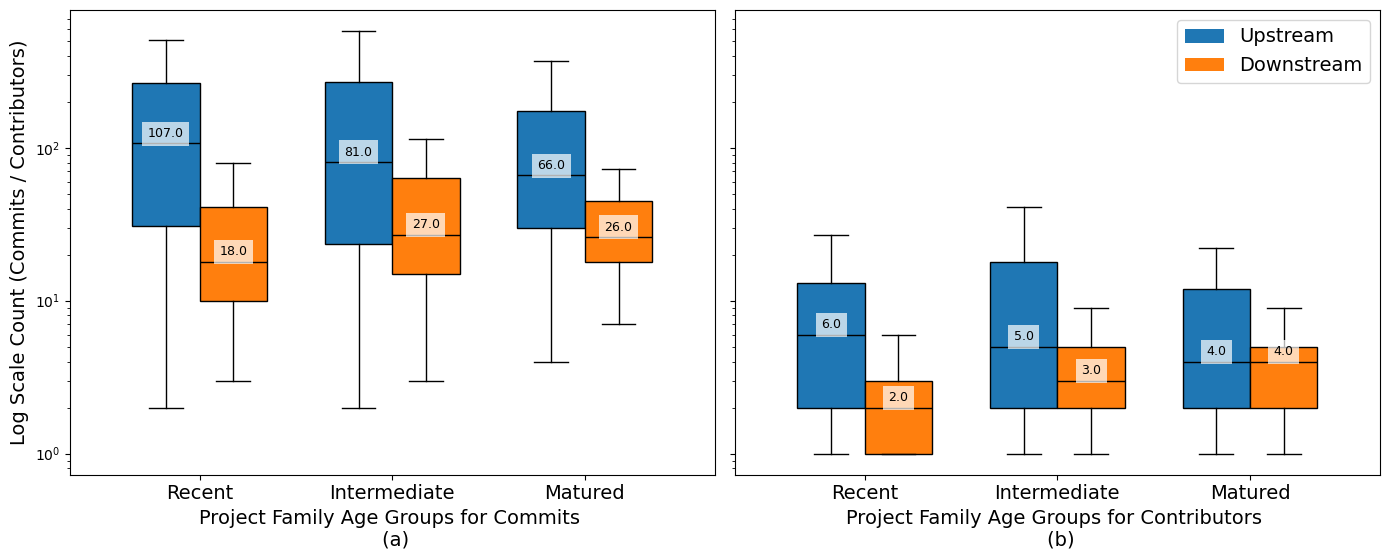

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Filter data
inclusion = list(main_df['family'].unique())
GH = df_gh[df_gh['family'].isin(inclusion)]
HF = df_hf[df_hf['family'].isin(inclusion)]

# Prepare data
GH_data = GH[["family", "commit_message", "age_group", "author_username"]]
HF_data = HF[["family", "combined", "age_group", "author"]]

# Count commits
gh_commit_dist = GH_data.groupby(['age_group', 'family'])['commit_message'].count().reset_index(name='commit_count')
hf_commit_dist = HF_data.groupby(['age_group', 'family'])['combined'].count().reset_index(name='commit_count')

# Count unique authors
gh_authors_dist = GH_data.groupby(['age_group', 'family'])['author_username'].nunique().reset_index(name='author_count')
hf_authors_dist = HF_data.groupby(['age_group', 'family'])['author'].nunique().reset_index(name='author_count')

# Plot settings
age_groups = ['Recent-Families', 'Intermediate-Families', 'Matured-Families']
positions = np.arange(len(age_groups))
box_width = 0.35
colors = {'Upstream': '#1f77b4', 'Downstream': '#ff7f0e'}

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# --- Left Plot: Commits ---
medians_up_c = []
medians_down_c = []

for i, ag in enumerate(age_groups):
    gh_values = gh_commit_dist[gh_commit_dist['age_group'] == ag]['commit_count'].tolist()
    hf_values = hf_commit_dist[hf_commit_dist['age_group'] == ag]['commit_count'].tolist()
    median_up = np.median(gh_values)
    median_down = np.median(hf_values)
    medians_up_c.append(median_up)
    medians_down_c.append(median_down)
    
    axes[0].boxplot(gh_values, positions=[positions[i] - box_width/2], widths=box_width,
                    patch_artist=True, boxprops=dict(facecolor=colors['Upstream'], color='black'),
                    medianprops=dict(color='black'), whiskerprops=dict(color='black'),
                    capprops=dict(color='black'), showfliers=False)
    
    axes[0].boxplot(hf_values, positions=[positions[i] + box_width/2], widths=box_width,
                    patch_artist=True, boxprops=dict(facecolor=colors['Downstream'], color='black'),
                    medianprops=dict(color='black'), whiskerprops=dict(color='black'),
                    capprops=dict(color='black'), showfliers=False)

    axes[0].text(x=positions[i] - box_width/2, y=median_up * 1.05,
                 s=f'{median_up:.1f}', ha='center', va='bottom', fontsize=9,
                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    
    axes[0].text(x=positions[i] + box_width/2, y=median_down * 1.05,
                 s=f'{median_down:.1f}', ha='center', va='bottom', fontsize=9,
                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

#axes[0].set_title('Commit Distribution')
axes[0].set_ylabel('Log Scale Count (Commits / Contributors)', fontsize=14)
axes[0].set_xlabel('Project Family Age Groups for Commits \n (a)', fontsize=14)
axes[0].set_xticks(positions)
short_labels = ['Recent', 'Intermediate', 'Matured']
axes[0].set_xticklabels(short_labels, fontsize=14)
axes[0].set_yscale('log')
#axes[0].grid(True, axis='y', which='both', linestyle='--', alpha=0.6)
axes[0].grid(False)

# --- Right Plot: Authors ---
medians_up_a = []
medians_down_a = []

for i, ag in enumerate(age_groups):
    gh_values = gh_authors_dist[gh_authors_dist['age_group'] == ag]['author_count'].tolist()
    hf_values = hf_authors_dist[hf_authors_dist['age_group'] == ag]['author_count'].tolist()
    median_up = np.median(gh_values)
    median_down = np.median(hf_values)
    medians_up_a.append(median_up)
    medians_down_a.append(median_down)
    
    axes[1].boxplot(gh_values, positions=[positions[i] - box_width/2], widths=box_width,
                    patch_artist=True, boxprops=dict(facecolor=colors['Upstream'], color='black'),
                    medianprops=dict(color='black'), whiskerprops=dict(color='black'),
                    capprops=dict(color='black'), showfliers=False)
    
    axes[1].boxplot(hf_values, positions=[positions[i] + box_width/2], widths=box_width,
                    patch_artist=True, boxprops=dict(facecolor=colors['Downstream'], color='black'),
                    medianprops=dict(color='black'), whiskerprops=dict(color='black'),
                    capprops=dict(color='black'), showfliers=False)

    axes[1].text(x=positions[i] - box_width/2, y=median_up * 1.05,
                 s=f'{median_up:.1f}', ha='center', va='bottom', fontsize=9,
                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    
    axes[1].text(x=positions[i] + box_width/2, y=median_down * 1.05,
                 s=f'{median_down:.1f}', ha='center', va='bottom', fontsize=9,
                 bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

#axes[1].set_title('Author Distribution')
axes[1].set_xlabel('Project Family Age Groups for Contributors \n (b)', fontsize=14)
axes[1].set_xticks(positions)
axes[1].set_xticklabels(short_labels, fontsize=14)
#axes[1].set_xticklabels(age_groups, fontsize=14)
#axes[1].grid(True, axis='y', which='both', linestyle='--', alpha=0.6)
axes[1].grid(False)

# Legend
legend_elements = [Patch(facecolor=colors['Upstream'], label='Upstream'),
                   Patch(facecolor=colors['Downstream'], label='Downstream')]
axes[1].legend(handles=legend_elements, loc='upper right', fontsize=14)

# Finalize
#fig.suptitle('Commits and Authors by Age Group and Source\n(Median values displayed, log scale, outliers hidden)', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('argument4.pdf', bbox_inches='tight', dpi=300)
plt.show()


In [12]:
import ast

# Load the datasets
file1 = "GH_labelled_with_patterns.csv"
file2 = "HF_labelled_with_patterns_authors.csv"
f2 = "../must_exclude_from_all_analysis.csv"
fams = "grouped_data_RQ2.csv"

df_gh = pd.read_csv(file1, encoding='latin1')
df_hf = pd.read_csv(file2, encoding='latin1')
dfs2 = pd.read_csv(f2, encoding='latin1')
df2_prime = pd.read_csv(fams, encoding='latin1')

HF1 = df_hf[df_hf['author_HF'] != "No_GH"]

exclusion = list(dfs2['family'].unique())

GH_link = df_gh[~df_gh['family'].isin(exclusion)]
HF_link = HF1[~HF1['family'].isin(exclusion)]

gh = GH_link.groupby("family").agg({
    'author_GH': 'unique'
}).reset_index()

hf = HF_link.groupby("family").agg({
    'author_HF': 'unique'
}).reset_index()

def string_to_list(x):
    if isinstance(x, str):
        try:
            return ast.literal_eval(x)
        except (SyntaxError, ValueError):
            return []
    return x

# Apply the function to ensure that the author columns contains list
gh['author_GH'] = gh['author_GH'].apply(string_to_list)
hf['author_HF'] = hf['author_HF'].apply(string_to_list)
hf

,family,author_HF
0,01-ai_YI,"[https://github.com/Mia-xia, https://github.co..."
1,1-800-BAD-CODE_XLM-ROBERTA,[https://github.com/1-800-BAD-CODE]
2,42dot_42DOT-LLM,[https://github.com/wangcho2k]
3,AnnaWegmann_Style-Embedding,[https://github.com/AnnaWegmann]
4,BAAI_bge,"[https://github.com/zacliu2023, https://github..."
...,...,...
301,wukevin_tcr-bert,[https://github.com/wukevin]
302,wxjiao_alpaca,[https://github.com/wxjiao]
303,xlnet_xlnet,"[https://github.com/gante, https://github.com/..."
304,yahma_llama,[https://github.com/gururise]


In [13]:
merged = pd.merge(hf, gh,  on="family", how="inner")

# Extract three families, their authors, and common authors
sample_families = merged  # Select the first three families
family_data = []

for _, row in sample_families.iterrows():
    family_name = row['family']
    authors_gh = set(row['author_GH'])  # Convert to set for comparison
    authors_hf = set(row['author_HF'])
    common_authors = list(authors_hf.intersection(authors_gh))  # Find common authors

    family_data.append({
        "family": family_name,
        "authors_GH": list(authors_gh),
        "authors_HF": list(authors_hf),
        "common_authors": common_authors
    })

# Convert to a DataFrame for easy display
result_df = pd.DataFrame(family_data)
result_df = result_df[result_df['common_authors'].apply(len) > 0]
#result_df['common_authors_count'] = result_df['common_authors'].apply(len)
exploded_df = result_df.explode('common_authors')

# Reset the index of the exploded dataframe
exploded_df = exploded_df.reset_index(drop=True)

# Display the exploded dataframe
exploded_df

,family,authors_GH,authors_HF,common_authors
0,01-ai_YI,"[https://github.com/Jack-devnlp, https://githu...","[https://github.com/findmyway, https://github....",https://github.com/findmyway
1,01-ai_YI,"[https://github.com/Jack-devnlp, https://githu...","[https://github.com/findmyway, https://github....",https://github.com/Anonymitaet
2,01-ai_YI,"[https://github.com/Jack-devnlp, https://githu...","[https://github.com/findmyway, https://github....",https://github.com/Mia-xia
3,01-ai_YI,"[https://github.com/Jack-devnlp, https://githu...","[https://github.com/findmyway, https://github....",https://github.com/ZhaoFancy
4,1-800-BAD-CODE_XLM-ROBERTA,"[https://github.com/Unknown, https://github.co...",[https://github.com/1-800-BAD-CODE],https://github.com/1-800-BAD-CODE
...,...,...,...,...
289,whaleloops_phrase-bert,"[https://github.com/whaleloops, https://github...",[https://github.com/whaleloops],https://github.com/whaleloops
290,wonrax_phobert,[https://github.com/wonrax],[https://github.com/wonrax],https://github.com/wonrax
291,wukevin_tcr-bert,"[https://github.com/swansonk14, https://github...",[https://github.com/wukevin],https://github.com/wukevin
292,wxjiao_alpaca,[https://github.com/wxjiao],[https://github.com/wxjiao],https://github.com/wxjiao


In [14]:
common_author_list = list(exploded_df["common_authors"].unique())
exclusion = list(dfs2['family'].unique())

GH_df = df_gh[~df_gh['family'].isin(exclusion)]
HF_df = df_hf[~df_hf['family'].isin(exclusion)]

family_groups = df2_prime.groupby(["family", "names", "Lagged", "age_group"])['model_name'].mean().reset_index()

merge_gh = pd.merge(GH_df, family_groups, on="family", how="inner")
merge_hf = pd.merge(HF_df, family_groups, on="family", how="inner")

tent_GH = merge_gh[merge_gh['author_GH'].isin(common_author_list)]
tent_HF = merge_hf[merge_hf['author_HF'].isin(common_author_list)]

In [15]:
tent_GH

,owner,cleaned_github,author_name,commit_message,author_username,commit_date,family,label,patterns,author_GH,names,Lagged,age_group,model_name
18,01-ai,https://github.com/01-ai/yi,Mia-xia,add files via upload,Mia-xia,2024-09-04 11:36:58+00:00,01-ai_YI,external documentation,Frequent Alignment Pattern,https://github.com/Mia-xia,Frequent Alignment,No Lag,Intermediate-Families,9.0
19,01-ai,https://github.com/01-ai/yi,Mia-xia,add files via upload,Mia-xia,2024-09-04 11:36:58+00:00,01-ai_YI,input data,Frequent Alignment Pattern,https://github.com/Mia-xia,Frequent Alignment,No Lag,Intermediate-Families,9.0
20,01-ai,https://github.com/01-ai/yi,Mia-xia,add files via upload,Mia-xia,2024-09-04 11:36:58+00:00,01-ai_YI,preprocessing,Frequent Alignment Pattern,https://github.com/Mia-xia,Frequent Alignment,No Lag,Intermediate-Families,9.0
21,01-ai,https://github.com/01-ai/yi,Mia-xia,add files via upload,Mia-xia,2024-09-04 10:52:14+00:00,01-ai_YI,external documentation,Frequent Alignment Pattern,https://github.com/Mia-xia,Frequent Alignment,No Lag,Intermediate-Families,9.0
22,01-ai,https://github.com/01-ai/yi,Mia-xia,add files via upload,Mia-xia,2024-09-04 10:52:14+00:00,01-ai_YI,input data,Frequent Alignment Pattern,https://github.com/Mia-xia,Frequent Alignment,No Lag,Intermediate-Families,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133495,llm-blender,https://github.com/yuchenlin/LLM-Blender,(Bill) Yuchen Lin,copied from swiftsage templates,yuchenlin,2023-05-31 22:37:13+00:00,llm-blender_PairRM,internal documentation,Intermittent Alignment Pattern,https://github.com/yuchenlin,Intermittent Alignment,Upstream First,Recent-Families,1.0
133496,llm-blender,https://github.com/yuchenlin/LLM-Blender,(Bill) Yuchen Lin,rename folder,yuchenlin,2023-05-31 22:34:37+00:00,llm-blender_PairRM,project metadata,Intermittent Alignment Pattern,https://github.com/yuchenlin,Intermittent Alignment,Upstream First,Recent-Families,1.0
133497,llm-blender,https://github.com/yuchenlin/LLM-Blender,(Bill) Yuchen Lin,rename folder,yuchenlin,2023-05-31 22:34:37+00:00,llm-blender_PairRM,internal documentation,Intermittent Alignment Pattern,https://github.com/yuchenlin,Intermittent Alignment,Upstream First,Recent-Families,1.0
133498,llm-blender,https://github.com/yuchenlin/LLM-Blender,(Bill) Yuchen Lin,create index.html,yuchenlin,2023-05-31 22:32:59+00:00,llm-blender_PairRM,external documentation,Intermittent Alignment Pattern,https://github.com/yuchenlin,Intermittent Alignment,Upstream First,Recent-Families,1.0


In [16]:
tent_HF

,owner,model_name_x,created_at,last_updated,family,model_size,previous_size_category,downloads,likes,library_name,...,files,combined,label,patterns,full_name,author_HF,names,Lagged,age_group,model_name_y
0,01-ai,01-ai/Yi-1.5-34B-Chat,3/15/2024,7/29/2024,01-ai_YI,6061.035520,large,68355,174,transformers,...,tokenizer.json,upload tokenizer.json,preprocessing,Frequent Alignment Pattern,Mia@01ai,https://github.com/Mia-xia,Frequent Alignment,No Lag,Intermediate-Families,9.0
1,01-ai,01-ai/Yi-1.5-34B-Chat,3/15/2024,7/29/2024,01-ai_YI,6061.035520,large,68355,174,transformers,...,tokenizer.json,delete tokenizer.json,preprocessing,Frequent Alignment Pattern,Mia@01ai,https://github.com/Mia-xia,Frequent Alignment,No Lag,Intermediate-Families,9.0
7,01-ai,01-ai/Yi-1.5-34B-Chat,3/15/2024,7/29/2024,01-ai_YI,6061.035520,large,68355,174,transformers,...,tokenizer.json,upload tokenizer.json,preprocessing,Frequent Alignment Pattern,Mia Xia,https://github.com/Mia-xia,Frequent Alignment,No Lag,Intermediate-Families,9.0
9,01-ai,01-ai/Yi-1.5-34B-Chat,3/15/2024,7/29/2024,01-ai_YI,6061.035520,large,68355,174,transformers,...,README.md,update readme.md,external documentation,Frequent Alignment Pattern,Yu,https://github.com/Anonymitaet,Frequent Alignment,No Lag,Intermediate-Families,9.0
10,01-ai,01-ai/Yi-1.5-34B-Chat,3/15/2024,7/29/2024,01-ai_YI,6061.035520,large,68355,174,transformers,...,README.md,update readme.md,external documentation,Frequent Alignment Pattern,Yu,https://github.com/Anonymitaet,Frequent Alignment,No Lag,Intermediate-Families,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16303,yangheng,yangheng/deberta-v3-base-absa-v1.1,3/19/2022,7/22/2024,yangheng_absa-model,184.424963,medium,51038,35,transformers,...,README.md,update readme.md,external documentation,Dispersed Alignment Pattern,HENG YANG,https://github.com/yangheng95,Dispersed Alignment,Upstream First,Matured-Families,1.0
16304,yangheng,yangheng/deberta-v3-base-absa-v1.1,3/19/2022,7/22/2024,yangheng_absa-model,184.424963,medium,51038,35,transformers,...,README.md,update readme.md,external documentation,Dispersed Alignment Pattern,HENG YANG,https://github.com/yangheng95,Dispersed Alignment,Upstream First,Matured-Families,1.0
16305,yangheng,yangheng/deberta-v3-base-absa-v1.1,3/19/2022,7/22/2024,yangheng_absa-model,184.424963,medium,51038,35,transformers,...,README.md,update readme.md,external documentation,Dispersed Alignment Pattern,HENG YANG,https://github.com/yangheng95,Dispersed Alignment,Upstream First,Matured-Families,1.0
16307,yangheng,yangheng/deberta-v3-base-absa-v1.1,3/19/2022,7/22/2024,yangheng_absa-model,184.424963,medium,51038,35,transformers,...,README.md,update readme.md,external documentation,Dispersed Alignment Pattern,HENG YANG,https://github.com/yangheng95,Dispersed Alignment,Upstream First,Matured-Families,1.0


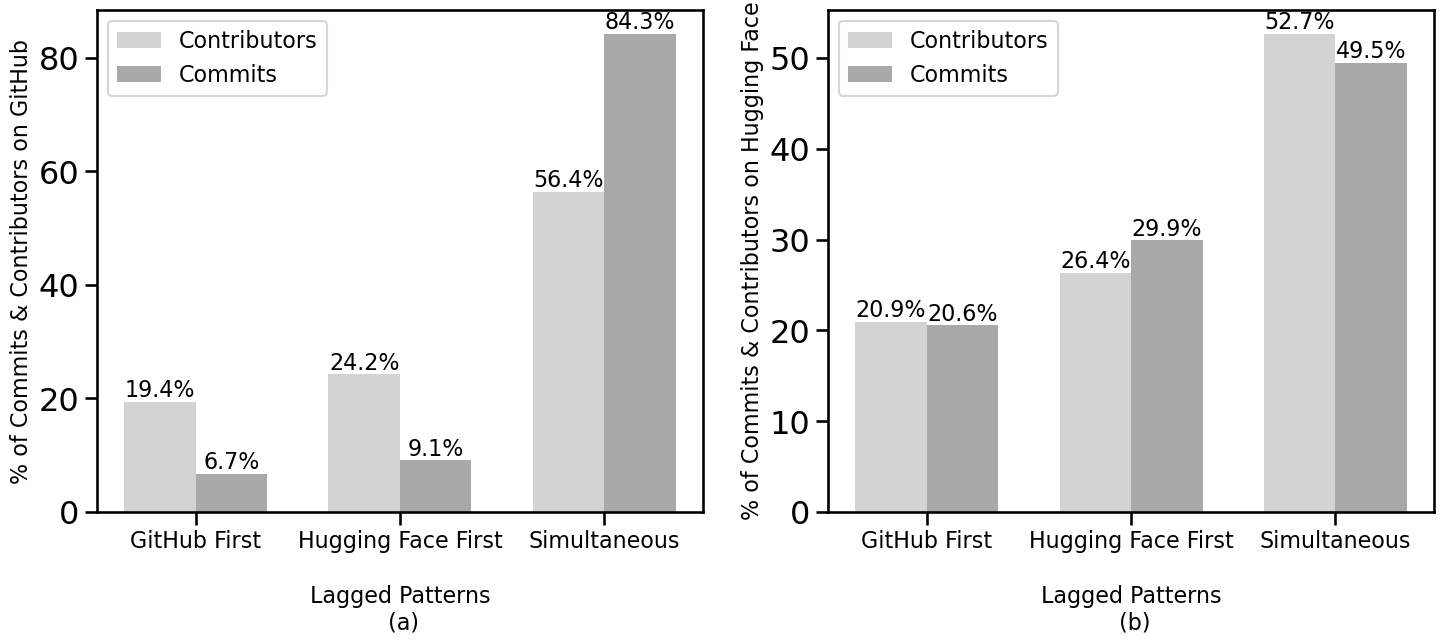

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for GitHub
gh_data = tent_GH.groupby('Lagged').agg({
    'author_GH': 'nunique',
    'commit_message': 'count'
}).reset_index()

gh_data['author_pct'] = gh_data['author_GH'] / gh_data['author_GH'].sum() * 100
gh_data['commit_pct'] = gh_data['commit_message'] / gh_data['commit_message'].sum() * 100

# Prepare data for Hugging Face
hf_data = tent_HF.groupby('Lagged').agg({
    'author_HF': 'nunique',
    'combined': 'count'
}).reset_index()

hf_data['author_pct'] = hf_data['author_HF'] / hf_data['author_HF'].sum() * 100
hf_data['commit_pct'] = hf_data['combined'] / hf_data['combined'].sum() * 100

# Set up the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Define lag groups and positions for bars
lag_groups = ['GitHub First', 'Hugging Face First', 'Simultaneous']
x = np.arange(len(lag_groups))
width = 0.35

# Plot for GitHub
ax1.bar(x - width/2, gh_data['author_pct'], width, label='Contributors', color='lightgray')
ax1.bar(x + width/2, gh_data['commit_pct'], width, label='Commits', color='darkgray')

ax1.set_ylabel('% of Commits & Contributors on GitHub', fontsize=16)
ax1.set_xlabel('\n Lagged Patterns \n (a)', fontsize=16)
ax1.set_xticks(x)
ax1.set_xticklabels(lag_groups, rotation=0, ha='center', fontsize=16)
ax1.legend(fontsize=16)

# Add percentage labels
for i, v in enumerate(gh_data['author_pct']):
    ax1.text(i - width/2, v, f'{v:.1f}%', ha='center', va='bottom', fontsize=16)
for i, v in enumerate(gh_data['commit_pct']):
    ax1.text(i + width/2, v, f'{v:.1f}%', ha='center', va='bottom', fontsize=16)

# Plot for Hugging Face
ax2.bar(x - width/2, hf_data['author_pct'], width, label='Contributors', color='lightgray')
ax2.bar(x + width/2, hf_data['commit_pct'], width, label='Commits', color='darkgray')

ax2.set_ylabel('% of Commits & Contributors on Hugging Face', fontsize=16)
ax2.set_xlabel('\n Lagged Patterns \n (b)', fontsize=16)
ax2.set_xticks(x)
ax2.set_xticklabels(lag_groups, rotation=0, ha='center', fontsize=16)
ax2.legend(fontsize=16)

# Add percentage labels
for i, v in enumerate(hf_data['author_pct']):
    ax2.text(i - width/2, v, f'{v:.1f}%', ha='center', va='bottom', fontsize=16)
for i, v in enumerate(hf_data['commit_pct']):
    ax2.text(i + width/2, v, f'{v:.1f}%', ha='center', va='bottom', fontsize=16)

plt.tight_layout()
plt.savefig("argument5.pdf", bbox_inches='tight')
plt.show()


C:\Users\LabSystem\AppData\Local\Temp\ipykernel_11336\2597859816.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tent_GH['Lagged'] = tent_GH['Lagged'].replace(rename_map)
C:\Users\LabSystem\AppData\Local\Temp\ipykernel_11336\2597859816.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tent_HF['Lagged'] = tent_HF['Lagged'].replace(rename_map)
C:\Users\LabSystem\AppData\Local\Temp\ipykernel_11336\2597859816.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

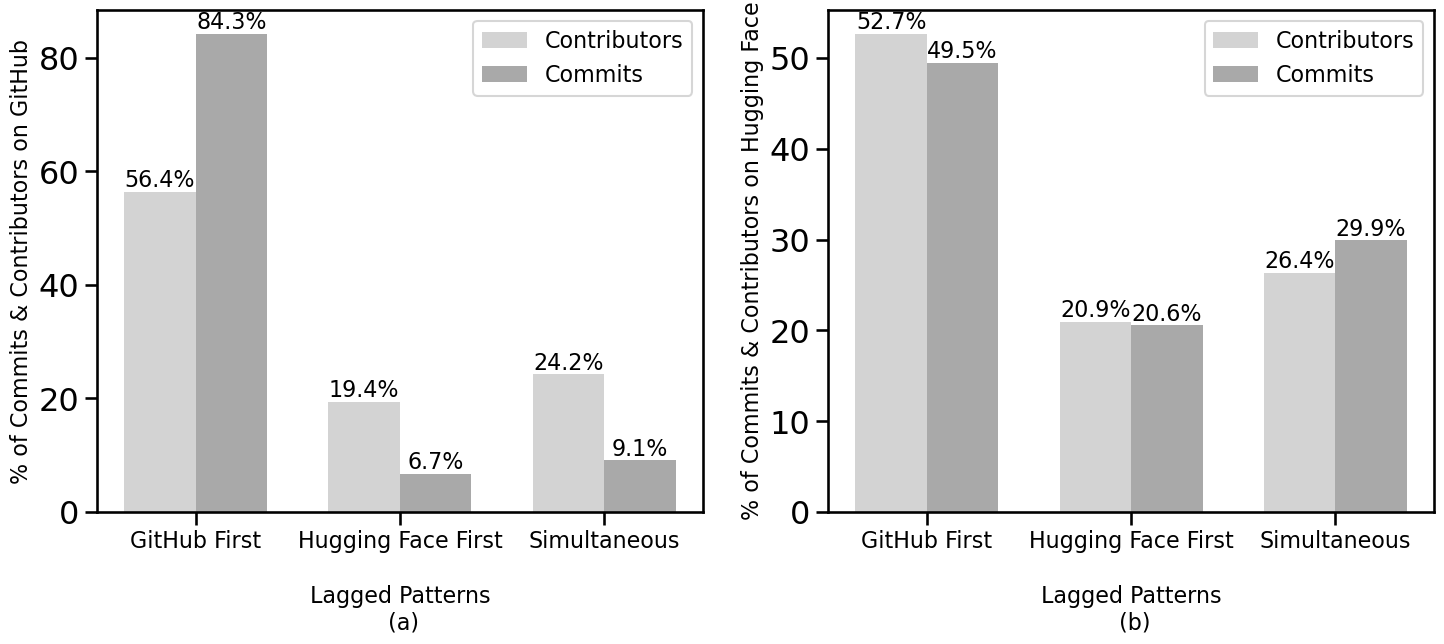

In [18]:
common_author_list = list(exploded_df["common_authors"].unique())
exclusion = list(dfs2['family'].unique())

GH_df = df_gh[~df_gh['family'].isin(exclusion)]
HF_df = df_hf[~df_hf['family'].isin(exclusion)]

family_groups = df2_prime.groupby(["family", "names", "Lagged", "age_group"])['model_name'].mean().reset_index()

merge_gh = pd.merge(GH_df, family_groups, on="family", how="inner")
merge_hf = pd.merge(HF_df, family_groups, on="family", how="inner")

tent_GH = merge_gh[merge_gh['author_GH'].isin(common_author_list)]
tent_HF = merge_hf[merge_hf['author_HF'].isin(common_author_list)]

rename_map = {
    'Upstream First': 'GitHub First',
    'Downstream First': 'Hugging Face First',
    'No Lag': 'Simultaneous'
}

tent_GH['Lagged'] = tent_GH['Lagged'].replace(rename_map)
tent_HF['Lagged'] = tent_HF['Lagged'].replace(rename_map)

# Ensure categorical ordering for correct plotting
category_order = ['GitHub First', 'Hugging Face First', 'Simultaneous']
tent_GH['Lagged'] = pd.Categorical(tent_GH['Lagged'], categories=category_order)
tent_HF['Lagged'] = pd.Categorical(tent_HF['Lagged'], categories=category_order)

# --- ORIGINAL CODE WITH CRITICAL FIXES ---
# Prepare data for GitHub
gh_data = tent_GH.groupby('Lagged', observed=True).agg({
    'author_GH': 'nunique',
    'commit_message': 'count'
}).reset_index()

gh_data['author_pct'] = gh_data['author_GH'] / gh_data['author_GH'].sum() * 100
gh_data['commit_pct'] = gh_data['commit_message'] / gh_data['commit_message'].sum() * 100

# Prepare data for Hugging Face
hf_data = tent_HF.groupby('Lagged', observed=True).agg({
    'author_HF': 'nunique',
    'combined': 'count'
}).reset_index()

hf_data['author_pct'] = hf_data['author_HF'] / hf_data['author_HF'].sum() * 100
hf_data['commit_pct'] = hf_data['combined'] / hf_data['combined'].sum() * 100

# Set up the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Define lag groups and positions for bars
lag_groups = category_order  # Use the predefined order
x = np.arange(len(lag_groups))
width = 0.35

# --- GitHub Plot ---
ax1.bar(x - width/2, gh_data['author_pct'], width, label='Contributors', color='lightgray')
ax1.bar(x + width/2, gh_data['commit_pct'], width, label='Commits', color='darkgray')

ax1.set_ylabel('% of Commits & Contributors on GitHub', fontsize=16)
ax1.set_xlabel('\n Lagged Patterns \n (a)', fontsize=16)
ax1.set_xticks(x)
ax1.set_xticklabels(lag_groups, rotation=0, ha='center', fontsize=16)
ax1.legend(fontsize=16)

# Add percentage labels
for i, v in enumerate(gh_data['author_pct']):
    ax1.text(i - width/2, v, f'{v:.1f}%', ha='center', va='bottom', fontsize=16)
for i, v in enumerate(gh_data['commit_pct']):
    ax1.text(i + width/2, v, f'{v:.1f}%', ha='center', va='bottom', fontsize=16)

# --- Hugging Face Plot ---
ax2.bar(x - width/2, hf_data['author_pct'], width, label='Contributors', color='lightgray')
ax2.bar(x + width/2, hf_data['commit_pct'], width, label='Commits', color='darkgray')

ax2.set_ylabel('% of Commits & Contributors on Hugging Face', fontsize=16)
ax2.set_xlabel('\n Lagged Patterns \n (b)', fontsize=16)
ax2.set_xticks(x)
ax2.set_xticklabels(lag_groups, rotation=0, ha='center', fontsize=16)
ax2.legend(fontsize=16)

# Add percentage labels
for i, v in enumerate(hf_data['author_pct']):
    ax2.text(i - width/2, v, f'{v:.1f}%', ha='center', va='bottom', fontsize=16)
for i, v in enumerate(hf_data['commit_pct']):
    ax2.text(i + width/2, v, f'{v:.1f}%', ha='center', va='bottom', fontsize=16)

plt.tight_layout()
plt.savefig("argument5.pdf", bbox_inches='tight')
plt.show()

In [ ]:
gh_data

In [ ]:
hf_data

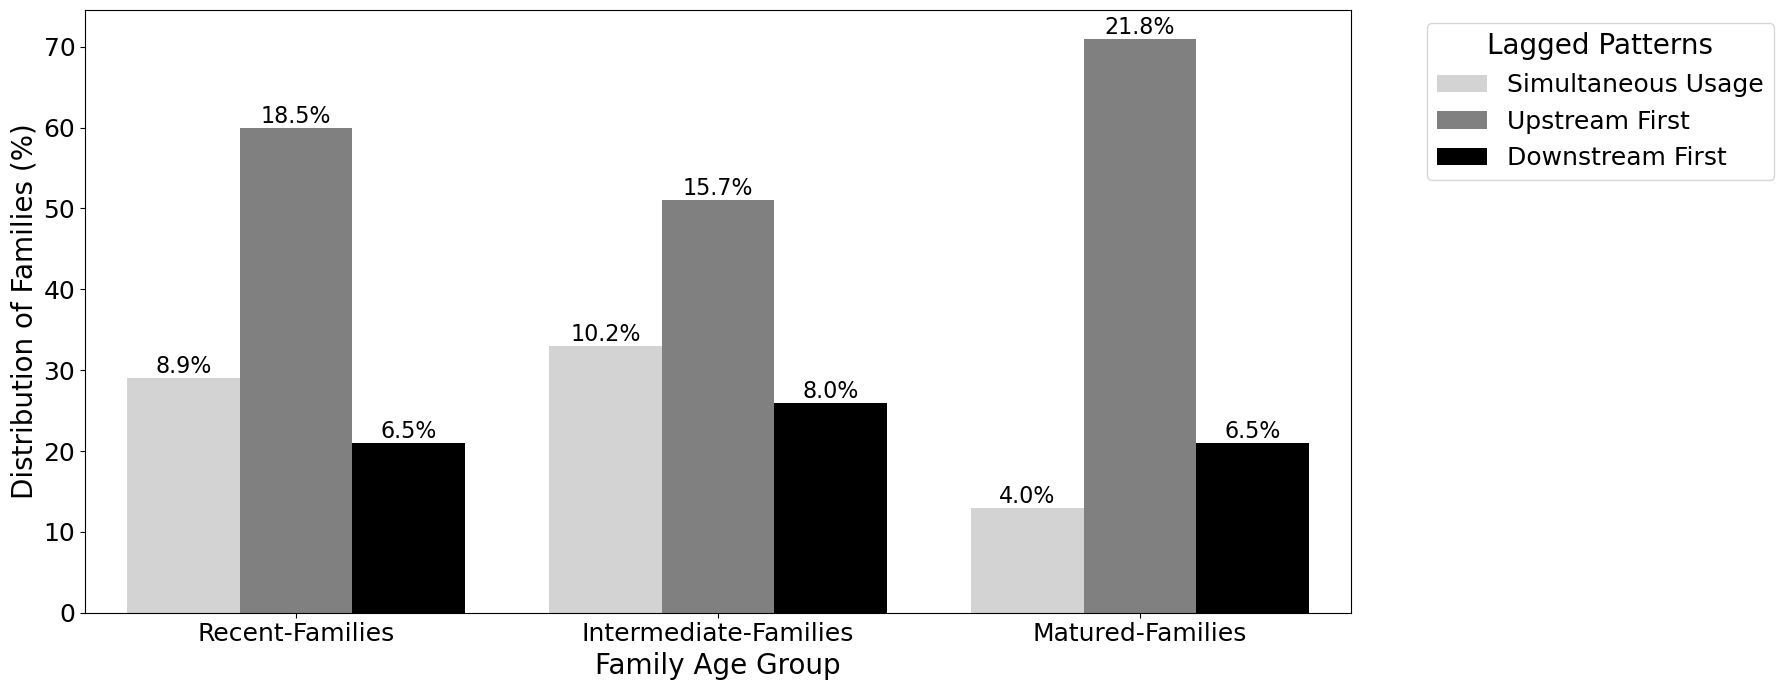

Index(['owner', 'family', 'family.1', 'model_name', 'pattern_names',
       'average_age_days', 'names', 'pipeline_tag', 'Lagged', 'library_name',
       'model_size_million_bytes', 'age_group'],
      dtype='object')


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file = "grouped_data_RQ2.csv"
f2 = "../must_exclude_from_all_analysis.csv"

df1 = pd.read_csv(file, encoding='latin1')
df2 = pd.read_csv(f2, encoding='latin1')

exclusion = list(df2['family'].unique())

df = df1[~df1['family'].isin(exclusion)]

"""df['Lagged'] = df['Lagged'].replace({
    'Upstream First': 'GitHub First',
    'Downstream First': 'Hugging Face First',
    'No Lag': 'Simultaneous'
})"""

df['Lagged'] = df['Lagged'].replace({
    'Upstream First': 'Upstream First',
    'Downstream First': 'Downstream First',
    'No Lag': 'Simultaneous Usage'
})

age_group_counts = df.groupby(['age_group', 'Lagged']).size().reset_index(name='count')

# Calculate the total count in each age_group for percentage calculation
age_group_totals = df['age_group'].value_counts().reset_index(name='total')
age_group_totals.columns = ['age_group', 'total']

category_order = ["Recent-Families", "Intermediate-Families", "Matured-Families"]

# Merge the counts with total counts to calculate percentages
age_group_counts = pd.merge(age_group_counts, age_group_totals, on='age_group')
age_group_counts['percentage'] = (age_group_counts['count'] / age_group_counts['total']) * 100

families_in_age = df.groupby('age_group')['family'].nunique()

# Plotting the distribution using seaborn countplot
grey_palette = ["#d3d3d3", "#808080", "#000000"] # Light grey, dark grey and black

# Plot with grey palette
plt.figure(figsize=(18, 7))
ax = sns.countplot(data=df, x="age_group", hue="Lagged", palette=grey_palette, order=category_order)

# Calculate total counts for percentages
total_counts = len(df)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        percentage = (height / total_counts) * 100
        ax.annotate(f'{percentage:.1f}%',
                    (p.get_x() + p.get_width() / 2., height),
                    ha="center", va="bottom", fontsize=16)  # Increased font size to 16

# Adding labels and title
plt.xlabel('Family Age Group', fontsize=20)
plt.ylabel('Distribution of Families (%)', fontsize=20)
plt.xticks(rotation=0, fontsize=18)
plt.yticks(fontsize=18)

# Increase legend font size
plt.legend(title='Lagged Patterns', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=18, title_fontsize=20)

# Adjust layout and save
plt.tight_layout()
plt.savefig("RQ2.3.1a.pdf", bbox_inches='tight')
plt.show()

print(df.columns)


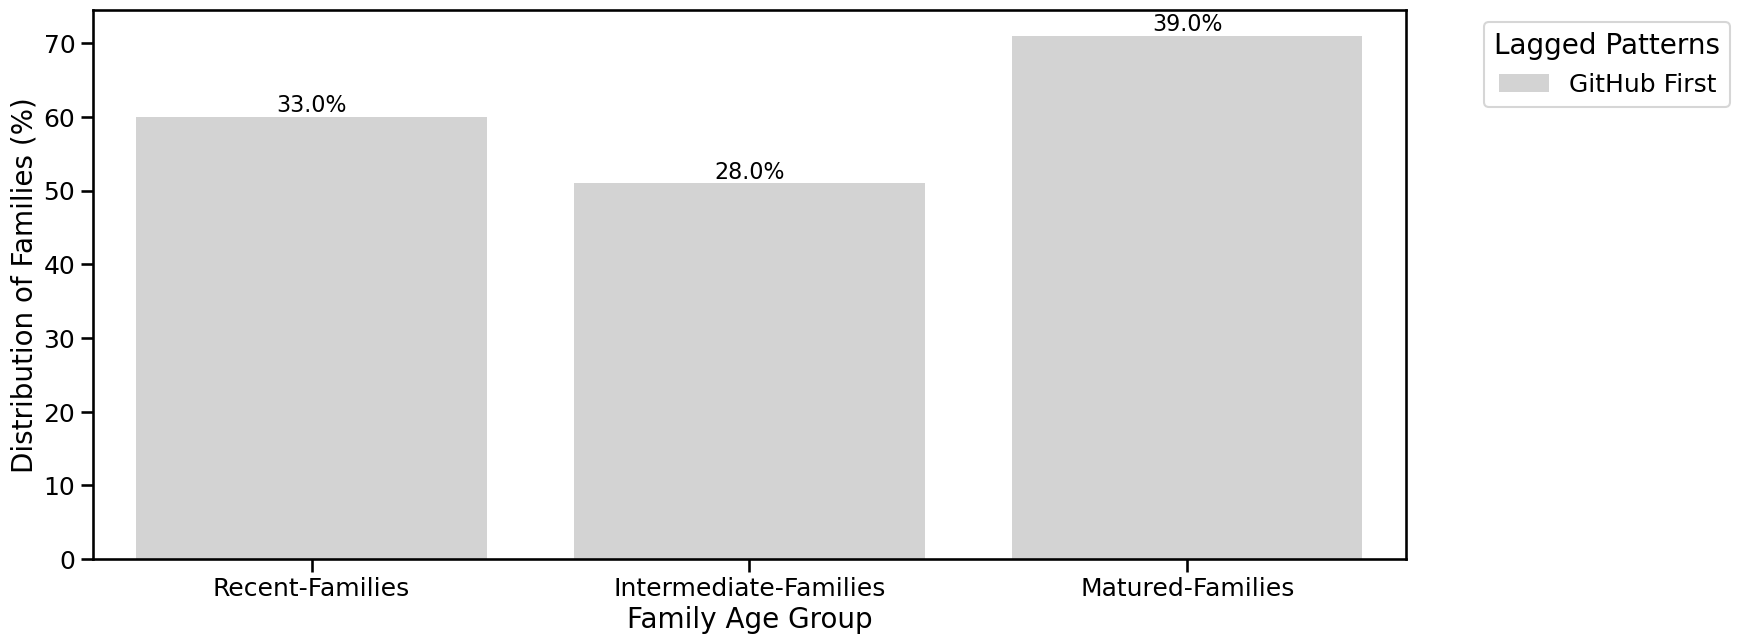

Index(['owner', 'family', 'family.1', 'model_name', 'pattern_names',
       'average_age_days', 'names', 'pipeline_tag', 'Lagged', 'library_name',
       'model_size_million_bytes', 'age_group'],
      dtype='object')


In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file = "grouped_data_RQ2.csv"
f2 = "../must_exclude_from_all_analysis.csv"

df1 = pd.read_csv(file, encoding='latin1')
df2 = pd.read_csv(f2, encoding='latin1')

exclusion = list(df2['family'].unique())

df_prime = df1[~df1['family'].isin(exclusion)]

df_prime['Lagged'] = df_prime['Lagged'].replace({
    'Upstream First': 'GitHub First',
    'Downstream First': 'Hugging Face First',
    'No Lag': 'Simultaneous'
})

df = df_prime[df_prime['Lagged'] == "GitHub First"]

age_group_counts = df.groupby(['age_group', 'Lagged']).size().reset_index(name='count')

# Calculate the total count in each age_group for percentage calculation
age_group_totals = df['age_group'].value_counts().reset_index(name='total')
age_group_totals.columns = ['age_group', 'total']

category_order = ["Recent-Families", "Intermediate-Families", "Matured-Families"]

# Merge the counts with total counts to calculate percentages
age_group_counts = pd.merge(age_group_counts, age_group_totals, on='age_group')
age_group_counts['percentage'] = (age_group_counts['count'] / age_group_counts['total']) * 100

families_in_age = df.groupby('age_group')['family'].nunique()

# Plotting the distribution using seaborn countplot
grey_palette = ["#d3d3d3", "#808080", "#000000"] # Light grey, dark grey and black

# Plot with grey palette
plt.figure(figsize=(18, 7))
ax = sns.countplot(data=df, x="age_group", hue="Lagged", palette=grey_palette, order=category_order)

# Calculate total counts for percentages
total_counts = len(df)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        percentage = (height / total_counts) * 100
        ax.annotate(f'{percentage:.1f}%',
                    (p.get_x() + p.get_width() / 2., height),
                    ha="center", va="bottom", fontsize=16)  # Increased font size to 16

# Adding labels and title
plt.xlabel('Family Age Group', fontsize=20)
plt.ylabel('Distribution of Families (%)', fontsize=20)
plt.xticks(rotation=0, fontsize=18)
plt.yticks(fontsize=18)

# Increase legend font size
plt.legend(title='Lagged Patterns', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=18, title_fontsize=20)

# Adjust layout and save
plt.tight_layout()
plt.savefig("RQ2.3.1a.pdf", bbox_inches='tight')
plt.show()

print(df.columns)


In [21]:
df1

,owner,family,family.1,model_name,pattern_names,average_age_days,names,pipeline_tag,Lagged,library_name,model_size_million_bytes,age_group
0,01-ai,01-ai_YI,01-ai_YI,9,Frequent Alignment Pattern,195.444444,Frequent Alignment,text-generation,No Lag,transformers,22721.538590,Intermediate-Families
1,1-800-BAD-CODE,1-800-BAD-CODE_XLM-ROBERTA,1-800-BAD-CODE_XLM-ROBERTA,1,Dispersed Alignment Pattern,68.000000,Dispersed Alignment,text2text-generation,Upstream First,generic,34388.917250,Recent-Families
2,42dot,42dot_42DOT-LLM,42dot_42DOT-LLM,1,Sparse Alignment Pattern,140.000000,Sparse Alignment,text-generation,No Lag,transformers,1439.271680,Intermediate-Families
3,af1tang,af1tang_PERSONALGPT,af1tang_PERSONALGPT,1,Rare Disjoing pattern,715.000000,Rare Disjoing,text-generation,Upstream First,transformers,117.000000,Matured-Families
4,ai-forever,ai-forever_gpt,ai-forever_gpt,5,Dispersed Alignment Pattern,915.200000,Dispersed Alignment,"text-generation,fill-mask",No Lag,transformers,368.981734,Matured-Families
...,...,...,...,...,...,...,...,...,...,...,...,...
320,wxjiao,wxjiao_alpaca,xlnet_xlnet,1,Rare Alignment Pattern,15.000000,Rare Alignment,text-generation,No Lag,transformers,7000.000000,Recent-Families
321,xlnet,xlnet_xlnet,yahma_llama,2,Dispersed Alignment Pattern,1300.500000,Dispersed Alignment,text-generation,No Lag,transformers,0.000000,Matured-Families
322,yahma,yahma_llama,yangheng_absa-model,1,Rare Disjoing pattern,0.000000,Rare Disjoing,text-generation,Upstream First,transformers,7000.000000,Recent-Families
323,yangheng,yangheng_absa-model,YituTech_conv-bert,1,Dispersed Alignment Pattern,774.000000,Dispersed Alignment,text-classification,Upstream First,transformers,184.424963,Matured-Families


In [22]:
f2 = "../RQ1/must_exclude_from_all_analysis.csv"
gh = "../RQ1/GH_data_devil.csv"
hf = "../RQ1//HF_data_devil.csv"

dfs2 = pd.read_csv(f2, encoding='latin1')
df_gh = pd.read_csv(gh, encoding='latin1')
df_hf = pd.read_csv(hf, encoding='latin1')

exclusion = list(dfs2['family'].unique())

df1 = df_gh[~df_gh['family'].isin(exclusion)]
df2 = df_hf[~df_hf['family'].isin(exclusion)]

df1['Year'] = pd.to_datetime(df1['commit_date']).dt.year

# For df2: Extract year from 'date' column
df2['Year'] = pd.to_datetime(df2['date']).dt.year

GH1 = df1[df1["Year"] >= 2016]
HF1 = df2[df2["Year"] >= 2016]

"""GH = GH1.groupby(['owner', 'clean_github', 'family', 'age_group']).agg({
    "commit_date": 
})"""

C:\Users\LabSystem\AppData\Local\Temp\ipykernel_11336\1720242143.py:6: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_gh = pd.read_csv(gh, encoding='latin1')


'GH = GH1.groupby([\'owner\', \'clean_github\', \'family\', \'age_group\']).agg({\n    "commit_date": \n})'

In [23]:
df1

,owner,cleaned_github,author_name,commit_message,author_username,commit_date,family,label,issue_resolved,age_group,category,Year
0,01-ai,https://github.com/01-ai/yi,Haijian Wang,update readme.md,Haijian06,2024-09-23 12:36:06+00:00,01-ai_YI,external documentation,NaN,Intermediate-Families,Release Pipeline,2024
1,01-ai,https://github.com/01-ai/yi,nlmlml,update readme.md,nlmlml,2024-09-23 12:19:50+00:00,01-ai_YI,external documentation,NaN,Intermediate-Families,Release Pipeline,2024
2,01-ai,https://github.com/01-ai/yi,Haijian Wang,update readme.md,Haijian06,2024-09-23 12:17:42+00:00,01-ai_YI,external documentation,NaN,Intermediate-Families,Release Pipeline,2024
3,01-ai,https://github.com/01-ai/yi,Haijian Wang,update readme.md,Haijian06,2024-09-23 12:13:15+00:00,01-ai_YI,external documentation,NaN,Intermediate-Families,Release Pipeline,2024
4,01-ai,https://github.com/01-ai/yi,Haijian Wang,update readme.md,Haijian06,2024-09-23 12:08:43+00:00,01-ai_YI,external documentation,NaN,Intermediate-Families,Release Pipeline,2024
...,...,...,...,...,...,...,...,...,...,...,...,...
133141,xlnet,https://github.com/zihangdai/xlnet,Zihang Dai,edit download link,zihangdai,2019-06-19 23:34:13+00:00,xlnet_xlnet,external documentation,NaN,Matured-Families,Release Pipeline,2019
133142,xlnet,https://github.com/zihangdai/xlnet,Zihang Dai,merge branch 'master' of github.com:zihangdai/...,zihangdai,2019-06-19 23:23:46+00:00,xlnet_xlnet,internal documentation,NaN,Matured-Families,Release Pipeline,2019
133143,xlnet,https://github.com/zihangdai/xlnet,Zihang Dai,initial release of xlnet,zihangdai,2019-06-19 23:23:36+00:00,xlnet_xlnet,project metadata,NaN,Matured-Families,Release Pipeline,2019
133144,xlnet,https://github.com/zihangdai/xlnet,Zhilin Yang,update license,Unknown,2019-06-19 23:10:02+00:00,xlnet_xlnet,project metadata,NaN,Matured-Families,Release Pipeline,2019


In [24]:
GH1['commit_date'] = pd.to_datetime(GH1['commit_date'])

# Sort by group and commit date
GH_sorted = GH1.sort_values(by=['owner', 'cleaned_github', 'family', 'age_group', 'commit_date'])

# Calculate time differences between consecutive commits
GH_sorted['time_diff'] = GH_sorted.groupby(
    ['owner', 'cleaned_github', 'family', 'age_group']
)['commit_date'].diff()

# Calculate average time between commits per group
GH_average_commit_time = GH_sorted.groupby(
    ['owner', 'cleaned_github', 'family', 'age_group']
).agg(
    total_commits=('commit_date', 'count'),
    avg_time_between_commits=('time_diff', lambda x: x.mean().total_seconds() / 3600)  # in hours
).reset_index()


HF1['date'] = pd.to_datetime(HF1['date'])

# Sort by group and commit date
HF_sorted = HF1.sort_values(by=['owner', 'family', 'age_group', 'date'])

# Calculate time differences between consecutive commits
HF_sorted['time_diff'] = HF_sorted.groupby(
    ['owner', 'family', 'age_group'])['date'].diff()

# Calculate average time between commits per group
HF_average_commit_time = HF_sorted.groupby(
    ['owner', 'family', 'age_group']).agg(
    total_commits=('date', 'count'),
    avg_time_between_commits=('time_diff', lambda x: x.mean().total_seconds() / 3600)  # in hours
).reset_index()

HF_average_commit_time

C:\Users\LabSystem\AppData\Local\Temp\ipykernel_11336\2517686661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GH1['commit_date'] = pd.to_datetime(GH1['commit_date'])


,owner,family,age_group,total_commits,avg_time_between_commits
0,01-ai,01-ai_YI,Intermediate-Families,561,14.228571
1,1-800-BAD-CODE,1-800-BAD-CODE_XLM-ROBERTA,Recent-Families,51,33.120000
2,42dot,42dot_42DOT-LLM,Intermediate-Families,3,1680.000000
3,AnnaWegmann,AnnaWegmann_Style-Embedding,Matured-Families,7,3504.000000
4,BAAI,BAAI_bge,Intermediate-Families,301,30.320000
...,...,...,...,...,...
321,wukevin,wukevin_tcr-bert,Recent-Families,8,325.714286
322,wxjiao,wxjiao_alpaca,Recent-Families,18,21.176471
323,xlnet,xlnet_xlnet,Matured-Families,32,1016.516129
324,yahma,yahma_llama,Recent-Families,3,0.000000


In [25]:
df2

,owner,model_name,created_at,last_updated,family,model_size,previous_size_category,downloads,likes,library_name,...,message,commit_id,date,author,files,combined,label,age_group,category,Year
0,01-ai,01-ai/Yi-1.5-34B-Chat,3/15/2024,7/29/2024,01-ai_YI,6061.03552,large,68355,174,transformers,...,NaN,fa4ffba162f20948bf77c2a30eca952bf0812b7f,8/27/2024,Mia01ai,tokenizer.json,upload tokenizer.json,preprocessing,Intermediate-Families,Data Pipeline,2024
1,01-ai,01-ai/Yi-1.5-34B-Chat,3/15/2024,7/29/2024,01-ai_YI,6061.03552,large,68355,174,transformers,...,NaN,c778adea4d63eb5812ee2f4bfff0f43fe1e99cde,8/27/2024,Mia01ai,tokenizer.json,delete tokenizer.json,preprocessing,Intermediate-Families,Data Pipeline,2024
2,01-ai,01-ai/Yi-1.5-34B-Chat,3/15/2024,7/29/2024,01-ai_YI,6061.03552,large,68355,174,transformers,...,NaN,aa880dd36346295f0ef0255cd8c8e398251a0f5e,6/26/2024,Chen-01AI,NOTICE,upload notice,external documentation,Intermediate-Families,Release Pipeline,2024
3,01-ai,01-ai/Yi-1.5-34B-Chat,3/15/2024,7/29/2024,01-ai_YI,6061.03552,large,68355,174,transformers,...,NaN,8a09fd99c176e9024ee64e319883e4da479b8bc1,6/26/2024,Chen-01AI,NOTICE,delete notice,external documentation,Intermediate-Families,Release Pipeline,2024
4,01-ai,01-ai/Yi-1.5-34B-Chat,3/15/2024,7/29/2024,01-ai_YI,6061.03552,large,68355,174,transformers,...,NaN,3a2619d14e1cf6a9fe1792c2b96acfb4538272c7,6/26/2024,Chen-01AI,NOTICE,upload notice,external documentation,Intermediate-Families,Release Pipeline,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16311,YituTech,YituTech/conv-bert-base,3/2/2022,2/24/2021,YituTech_conv-bert,0.00000,unknown,3038158,8,transformers,...,NaN,9001261c1cbfc93899a1cab9d2e9c980f65835a4,2/2/2021,abhishek,config.json,fix config,parameter tuning,Recent-Families,Modelling Pipeline,2021
16312,YituTech,YituTech/conv-bert-base,3/2/2022,2/24/2021,YituTech_conv-bert,0.00000,unknown,3038158,8,transformers,...,NaN,3abdc6f9b0755d5260e97df36d4bfe147b0310b7,1/21/2021,abhishek,"pytorch_model.bin, tf_model.h5",update models,model structure,Recent-Families,Modelling Pipeline,2021
16313,YituTech,YituTech/conv-bert-base,3/2/2022,2/24/2021,YituTech_conv-bert,0.00000,unknown,3038158,8,transformers,...,NaN,64c19bcb08466f8547285d8d262ab8a723185309,1/21/2021,abhishek,config.json,fix path,preprocessing,Recent-Families,Data Pipeline,2021
16314,YituTech,YituTech/conv-bert-base,3/2/2022,2/24/2021,YituTech_conv-bert,0.00000,unknown,3038158,8,transformers,...,NaN,ea841915807b45fbaca73983bba97921046a5601,1/21/2021,abhishek,"config.json, pytorch_model.bin, tf_model.h5, v...",add convbert base,model structure,Recent-Families,Modelling Pipeline,2021


In [26]:
import pandas as pd

# Load datasets
f2 = "../RQ1/must_exclude_from_all_analysis.csv"
gh = "../RQ1/GH_data_devil.csv"
hf = "../RQ1/HF_data_devil.csv"

dfs2 = pd.read_csv(f2, encoding='latin1')
df_gh = pd.read_csv(gh, encoding='latin1')
df_hf = pd.read_csv(hf, encoding='latin1')

# Exclude families that should not be analyzed
exclusion = set(dfs2['family'].unique())
df_gh = df_gh[~df_gh['family'].isin(exclusion)]
df_hf = df_hf[~df_hf['family'].isin(exclusion)]

# Convert commit dates
df_gh['commit_date'] = pd.to_datetime(df_gh['commit_date'], utc=True).dt.tz_convert(None)
df_hf['date'] = pd.to_datetime(df_hf['date'], format='%m/%d/%Y', errors='coerce')

# Drop invalid dates
df_hf = df_hf.dropna(subset=['date'])

# Filter commits from 2016 onward
df_gh = df_gh[df_gh['commit_date'].dt.year >= 2016]
df_hf = df_hf[df_hf['date'].dt.year >= 2016]

# Sort by family and commit date
df_gh = df_gh.sort_values(by=['family', 'commit_date'])
df_hf = df_hf.sort_values(by=['family', 'date'])

# Store results
time_diffs = []

# Process each family
for family in set(df_gh['family']).union(set(df_hf['family'])):
    gh_commits = df_gh[df_gh['family'] == family]['commit_date']
    hf_commits = df_hf[df_hf['family'] == family]['date']
    
    # Combine and sort commits
    all_commits = (
        pd.concat([gh_commits.rename("date"), hf_commits.rename("date")])
        .sort_values()
        .reset_index(drop=True)
    )
    
    # Identify platform for each commit
    platforms = [
        "GH" if date in gh_commits.values else "HF"
        for date in all_commits
    ]
    
    # Iterate through commits and find only GH → HF or HF → GH transitions
    for i in range(len(all_commits) - 1):
        if platforms[i] != platforms[i + 1]:  # Ensure platform switch
            prev_commit = all_commits.iloc[i]
            next_commit = all_commits.iloc[i + 1]
            diff_days = (next_commit - prev_commit).days

            time_diffs.append((family, platforms[i], platforms[i + 1], prev_commit, next_commit, diff_days))

# Convert to DataFrame
df_time_diffs = pd.DataFrame(time_diffs, columns=['family', 'source', 'target', 'prev_commit', 'next_commit', 'days_difference'])

# Display summary statistics

# Save results
df_time_diffs.to_csv("GH_HF_commit_time_differences.csv", index=False)

df_time_diffs['days_difference'].describe()


C:\Users\LabSystem\AppData\Local\Temp\ipykernel_11336\152112537.py:9: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_gh = pd.read_csv(gh, encoding='latin1')


count    3863.000000
mean       14.858400
std        53.722337
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max      1141.000000
Name: days_difference, dtype: float64

In [3]:
file1 = "GH_HF_commit_time_differences.csv"
file = "grouped_data_RQ2.csv"
f2 = "../must_exclude_from_all_analysis.csv"

dfs = pd.read_csv(file1, encoding='latin1')
df1 = pd.read_csv(file, encoding='latin1')
df2 = pd.read_csv(f2, encoding='latin1')

exclusion = list(df2['family'].unique())

df_prime = df1[~df1['family'].isin(exclusion)]


gr_df_prime = df_prime.groupby(['owner', 'family']).agg({
    'model_name': 'mean',
    'names': lambda x: ",".join(x.unique()), 
    'age_group': lambda x: ",".join(x.unique()),
    'Lagged': lambda x: ",".join(x.unique()),
}).reset_index()

gr_df_prime['Lagged'] = gr_df_prime['Lagged'].replace({
    'Upstream First': 'GitHub First',
    'Downstream First': 'Hugging Face First',
    'No Lag': 'Simultaneous'
})

combined_days_diff = pd.merge(dfs, gr_df_prime, on='family', how='inner')
combined_days_diff

,family,source,target,prev_commit,next_commit,days_difference,owner,model_name,names,age_group,Lagged
0,augmxnt_shisa,GH,HF,2023-12-06 13:06:47,2023-12-23 00:00:00,16,augmxnt,1.0,Sparse Alignment,Intermediate-Families,GitHub First
1,augmxnt_shisa,HF,GH,2023-12-23 00:00:00,2023-12-23 21:07:20,0,augmxnt,1.0,Sparse Alignment,Intermediate-Families,GitHub First
2,augmxnt_shisa,GH,HF,2023-12-23 21:07:20,2024-01-02 00:00:00,9,augmxnt,1.0,Sparse Alignment,Intermediate-Families,GitHub First
3,augmxnt_shisa,HF,GH,2024-01-02 00:00:00,2024-03-28 10:08:33,86,augmxnt,1.0,Sparse Alignment,Intermediate-Families,GitHub First
4,augmxnt_shisa,GH,HF,2024-03-30 04:53:04,2024-05-19 00:00:00,49,augmxnt,1.0,Sparse Alignment,Intermediate-Families,GitHub First
...,...,...,...,...,...,...,...,...,...,...,...
3858,facebook_dpr,GH,HF,2020-11-20 21:31:01,2020-11-25 00:00:00,4,facebook,2.0,Dispersed Alignment,Matured-Families,GitHub First
3859,facebook_dpr,HF,GH,2020-11-25 00:00:00,2020-12-01 00:42:10,6,facebook,2.0,Dispersed Alignment,Matured-Families,GitHub First
3860,facebook_dpr,GH,HF,2022-03-08 20:10:06,2022-12-21 00:00:00,287,facebook,2.0,Dispersed Alignment,Matured-Families,GitHub First
3861,wonrax_phobert,HF,GH,2022-05-04 00:00:00,2022-05-04 07:26:18,0,wonrax,1.0,Rare Alignment,Recent-Families,Simultaneous


Kruskal-Wallis indicates significant differences between groups.
                    GitHub First  Hugging Face First  Simultaneous
GitHub First        1.000000e+00        7.084981e-03  1.000826e-07
Hugging Face First  7.084981e-03        1.000000e+00  1.849968e-10
Simultaneous        1.000826e-07        1.849968e-10  1.000000e+00


C:\Users\LabSystem\AppData\Local\Temp\ipykernel_8996\2080620487.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Lagged', y='days_difference', data=combined_days_diff, estimator=lambda x: x.mean(), ci=None, color='grey', order=sorted_order)


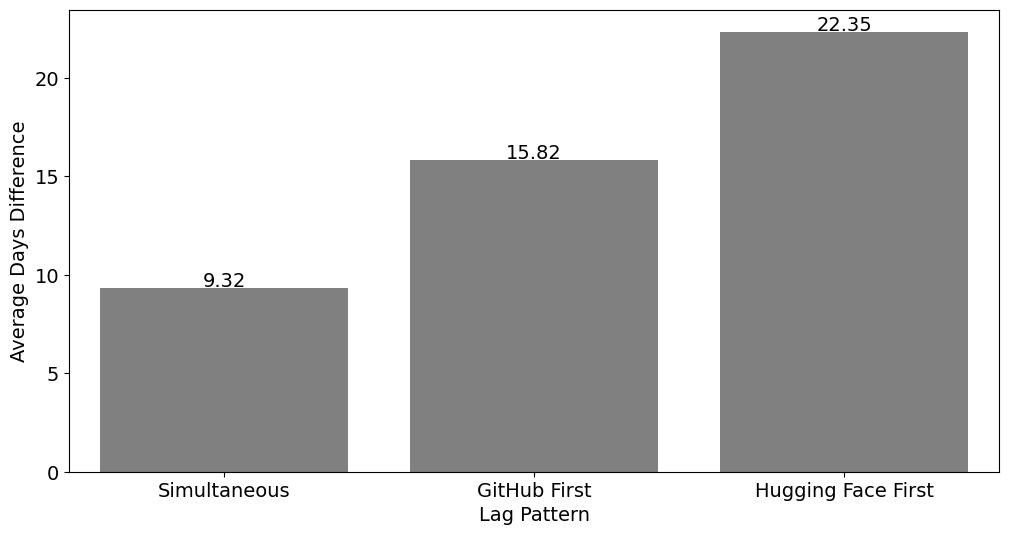

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scikit_posthocs import posthoc_dunn  # For post-hoc Dunn's test

# Set global font size to 14
plt.rcParams.update({'font.size': 14})

# Perform Kruskal-Wallis test to check if there's a significant difference between the groups
groups = [group["days_difference"].values for _, group in combined_days_diff.groupby("Lagged")]
stat, p = stats.kruskal(*groups)

# Check if the p-value is significant (p < 0.05)
if p < 0.05:
    print("Kruskal-Wallis indicates significant differences between groups.")
    
    # Perform Dunn's post-hoc test
    dunn_results = posthoc_dunn(combined_days_diff, val_col='days_difference', group_col='Lagged', p_adjust='bonferroni')
    print(dunn_results)
else:
    print("No significant differences found between groups.")

# Sort lag patterns by the median days_difference
# Sort lag patterns by the mean days_difference
sorted_order = combined_days_diff.groupby('Lagged')['days_difference'].mean().sort_values().index

# Create a bar plot with uniform grey color and sorted Lagged
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Lagged', y='days_difference', data=combined_days_diff, estimator=lambda x: x.mean(), ci=None, color='grey', order=sorted_order)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=0)

# Add labels and title
plt.xlabel('Lag Pattern')
plt.ylabel('Average Days Difference')

# Annotate the bars with the actual values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=14, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()


Kruskal-Wallis indicates significant differences between groups.
                         Dense Partial Alignment  Dispersed Alignment  \
Dense Partial Alignment             1.000000e+00         3.514010e-11   
Dispersed Alignment                 3.514010e-11         1.000000e+00   
Frequent Alignment                  1.252980e-02         3.483842e-66   
Intermittent Alignment              6.456600e-02         1.042775e-67   
Rare Alignment                      1.000000e+00         1.870778e-29   
Rare Disjoing                       4.951697e-29         1.419759e-17   
Sparse Alignment                    1.744077e-07         1.000000e+00   
Sporadic Disjoint                   2.907040e-38         5.343317e-25   

                         Frequent Alignment  Intermittent Alignment  \
Dense Partial Alignment        1.252980e-02            6.456600e-02   
Dispersed Alignment            3.483842e-66            1.042775e-67   
Frequent Alignment             1.000000e+00            1.000000e

C:\Users\LabSystem\AppData\Local\Temp\ipykernel_8996\400229816.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(y='names', x='days_difference', data=combined_days_diff, estimator=lambda x: x.mean(), ci=None, color='grey', order=sorted_order)


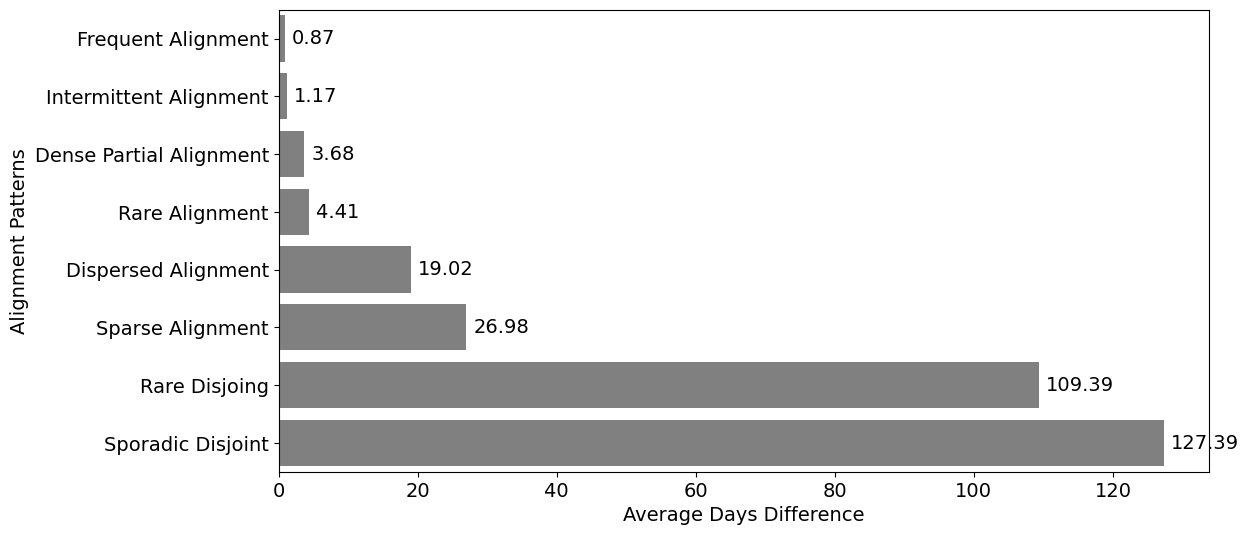

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scikit_posthocs import posthoc_dunn  # For post-hoc Dunn's test

# Set global font size to 14
plt.rcParams.update({'font.size': 14})

# Perform Kruskal-Wallis test to check if there's a significant difference between the groups
groups = [group["days_difference"].values for _, group in combined_days_diff.groupby("names")]
stat, p = stats.kruskal(*groups)

# Check if the p-value is significant (p < 0.05)
if p < 0.05:
    print("Kruskal-Wallis indicates significant differences between groups.")
    
    # Perform Dunn's post-hoc test
    dunn_results = posthoc_dunn(combined_days_diff, val_col='days_difference', group_col='names', p_adjust='bonferroni')
    print(dunn_results)
else:
    print("No significant differences found between groups.")


# Sort lag patterns by the mean days_difference
sorted_order = combined_days_diff.groupby('names')['days_difference'].mean().sort_values().index

# Create a horizontal bar plot with uniform grey color and sorted 'names'
plt.figure(figsize=(12, 6))
ax = sns.barplot(y='names', x='days_difference', data=combined_days_diff, estimator=lambda x: x.mean(), ci=None, color='grey', order=sorted_order)

# Rotate the y-axis labels for better visibility
plt.yticks(rotation=0)

# Add labels and title
plt.ylabel('Alignment Patterns')
plt.xlabel('Average Days Difference')
#plt.title('Average Days Difference by Lag Pattern')

# Annotate the bars with the actual values
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', 
                (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center', 
                fontsize=14, color='black', 
                xytext=(5, 0), textcoords='offset points')

# Show the plot
plt.show()

In [12]:
dunn_results = posthoc_dunn(combined_days_diff, val_col='days_difference', group_col='names', p_adjust='bonferroni')
dunn_results_df = pd.DataFrame(dunn_results)

# Save to CSV file
dunn_results_df.to_csv("dunn_test_results.csv", index=True)

print("Dunn's test results saved to 'dunn_test_results.csv'")

Dunn's test results saved to 'dunn_test_results.csv'


Kruskal-Wallis indicates significant differences between groups.
                       Intermediate-Families  Matured-Families  \
Intermediate-Families           1.000000e+00      2.689047e-18   
Matured-Families                2.689047e-18      1.000000e+00   
Recent-Families                 2.132124e-02      7.503541e-23   

                       Recent-Families  
Intermediate-Families     2.132124e-02  
Matured-Families          7.503541e-23  
Recent-Families           1.000000e+00  


C:\Users\LabSystem\AppData\Local\Temp\ipykernel_8996\2557644879.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='age_group', y='days_difference', data=combined_days_diff, estimator=lambda x: x.mean(), ci=None, color='grey', order=sorted_order)


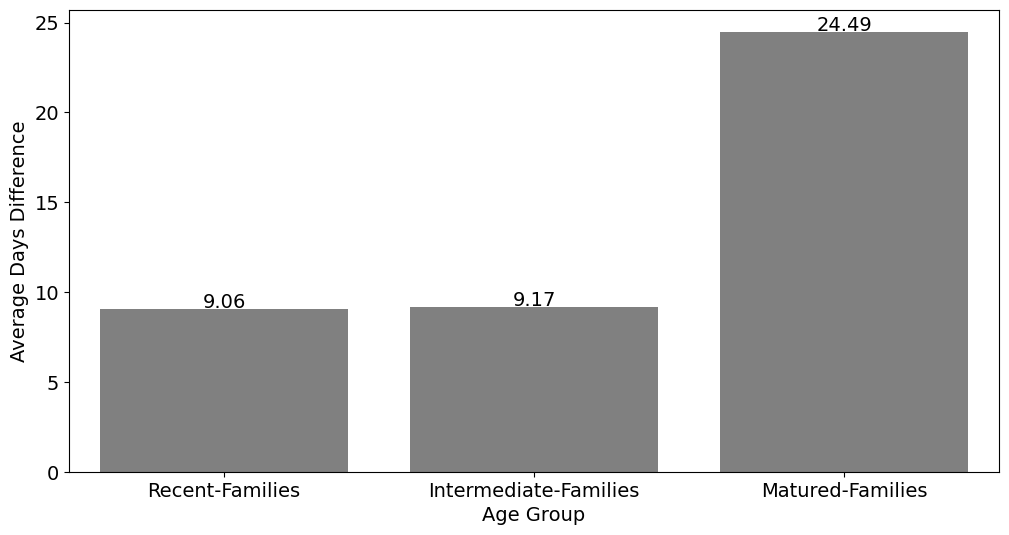

In [13]:
plt.rcParams.update({'font.size': 14})

# Perform Kruskal-Wallis test to check if there's a significant difference between the groups
groups = [group["days_difference"].values for _, group in combined_days_diff.groupby("age_group")]
stat, p = stats.kruskal(*groups)

# Check if the p-value is significant (p < 0.05)
if p < 0.05:
    print("Kruskal-Wallis indicates significant differences between groups.")
    
    # Perform Dunn's post-hoc test
    dunn_results = posthoc_dunn(combined_days_diff, val_col='days_difference', group_col='age_group', p_adjust='bonferroni')
    print(dunn_results)
else:
    print("No significant differences found between groups.")

# Sort lag patterns by the mean days_difference
sorted_order = combined_days_diff.groupby('age_group')['days_difference'].mean().sort_values().index

# Create a bar plot with uniform grey color and sorted Lagged
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='age_group', y='days_difference', data=combined_days_diff, estimator=lambda x: x.mean(), ci=None, color='grey', order=sorted_order)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=0)

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Average Days Difference')
#plt.title('Average Days Difference by Lag Pattern')

# Annotate the bars with the actual values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=14, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()

In [14]:
dunn_results = posthoc_dunn(combined_days_diff, val_col='days_difference', group_col='age_group', p_adjust='bonferroni')
dunn_results

,Intermediate-Families,Matured-Families,Recent-Families
Intermediate-Families,1.000000e+00,2.689047e-18,2.132124e-02
Matured-Families,2.689047e-18,1.000000e+00,7.503541e-23
Recent-Families,2.132124e-02,7.503541e-23,1.000000e+00


In [28]:
days_diff = df_time_diffs.groupby("family").agg({
    'days_difference': 'mean'
}).reset_index()

days_diff

,family,days_difference
0,01-ai_YI,1.015625
1,1-800-BAD-CODE_XLM-ROBERTA,79.000000
2,42dot_42DOT-LLM,11.000000
3,AnnaWegmann_Style-Embedding,48.500000
4,BAAI_bge,0.528926
...,...,...
320,wukevin_tcr-bert,31.333333
321,wxjiao_alpaca,0.000000
322,xlnet_xlnet,23.285714
323,yahma_llama,66.000000


C:\Users\LabSystem\AppData\Local\Temp\ipykernel_11336\3520044628.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Lagged', y='days_difference', data=combined_days_diff, estimator=lambda x: x.mean(), ci=None, color='grey', order=sorted_order)


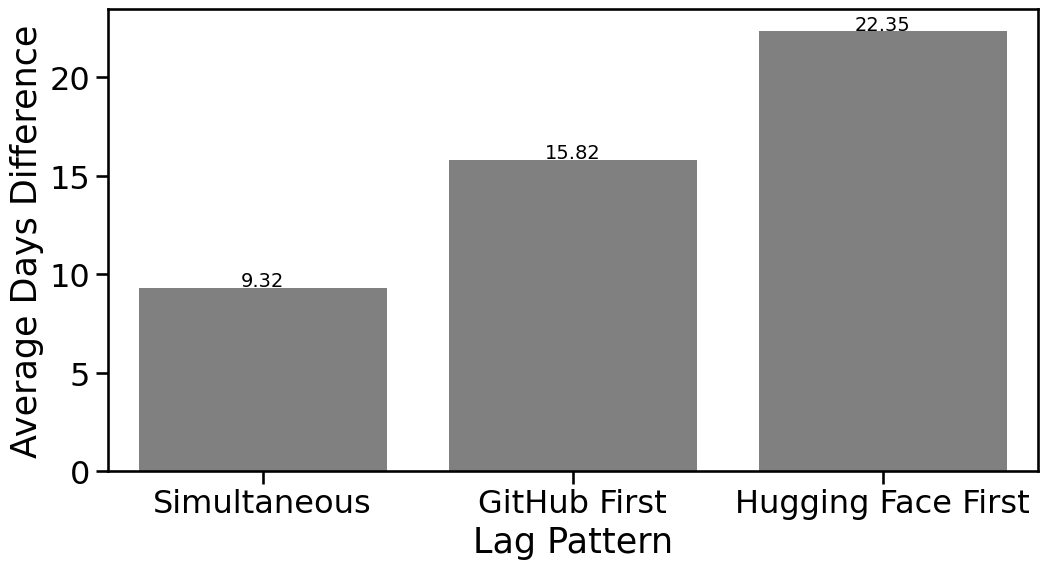

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set global font size to 14
plt.rcParams.update({'font.size': 14})

# Sort lag patterns by the mean days_difference
sorted_order = combined_days_diff.groupby('Lagged')['days_difference'].mean().sort_values().index

# Create a bar plot with uniform grey color and sorted Lagged
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Lagged', y='days_difference', data=combined_days_diff, estimator=lambda x: x.mean(), ci=None, color='grey', order=sorted_order)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=0)

# Add labels and title
plt.xlabel('Lag Pattern')
plt.ylabel('Average Days Difference')
#plt.title('Average Days Difference by Lag Pattern')

# Annotate the bars with the actual values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=14, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()


C:\Users\LabSystem\AppData\Local\Temp\ipykernel_11336\2223440693.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='age_group', y='days_difference', data=combined_days_diff, estimator=lambda x: x.mean(), ci=None, color='grey', order=sorted_order)


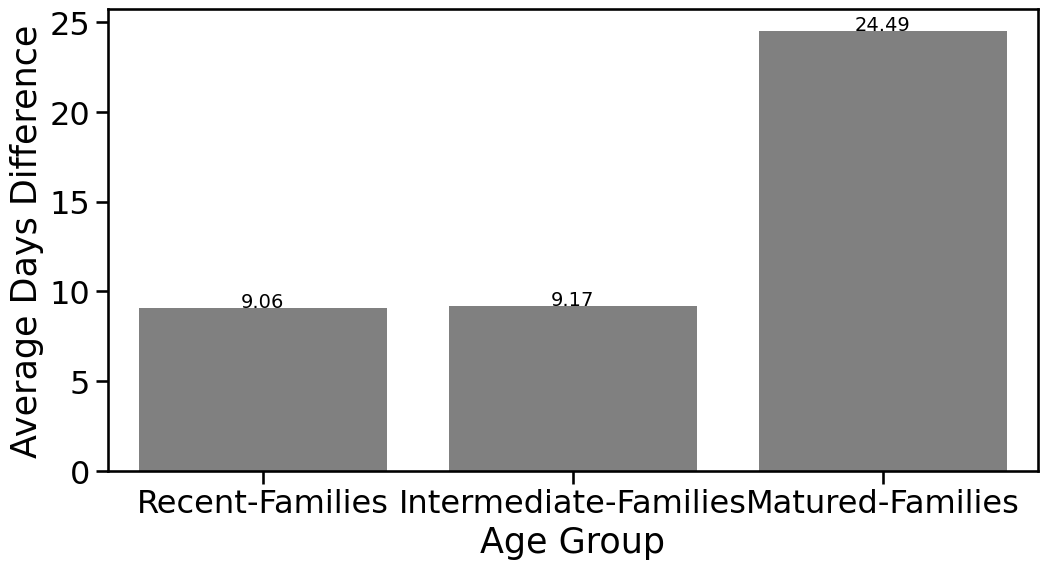

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set global font size to 14
plt.rcParams.update({'font.size': 14})

# Sort lag patterns by the mean days_difference
sorted_order = combined_days_diff.groupby('age_group')['days_difference'].mean().sort_values().index

# Create a bar plot with uniform grey color and sorted Lagged
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='age_group', y='days_difference', data=combined_days_diff, estimator=lambda x: x.mean(), ci=None, color='grey', order=sorted_order)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=0)

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Average Days Difference')
#plt.title('Average Days Difference by Lag Pattern')

# Annotate the bars with the actual values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=14, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()


C:\Users\LabSystem\AppData\Local\Temp\ipykernel_11336\1307699318.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(y='names', x='days_difference', data=combined_days_diff, estimator=lambda x: x.mean(), ci=None, color='grey', order=sorted_order)


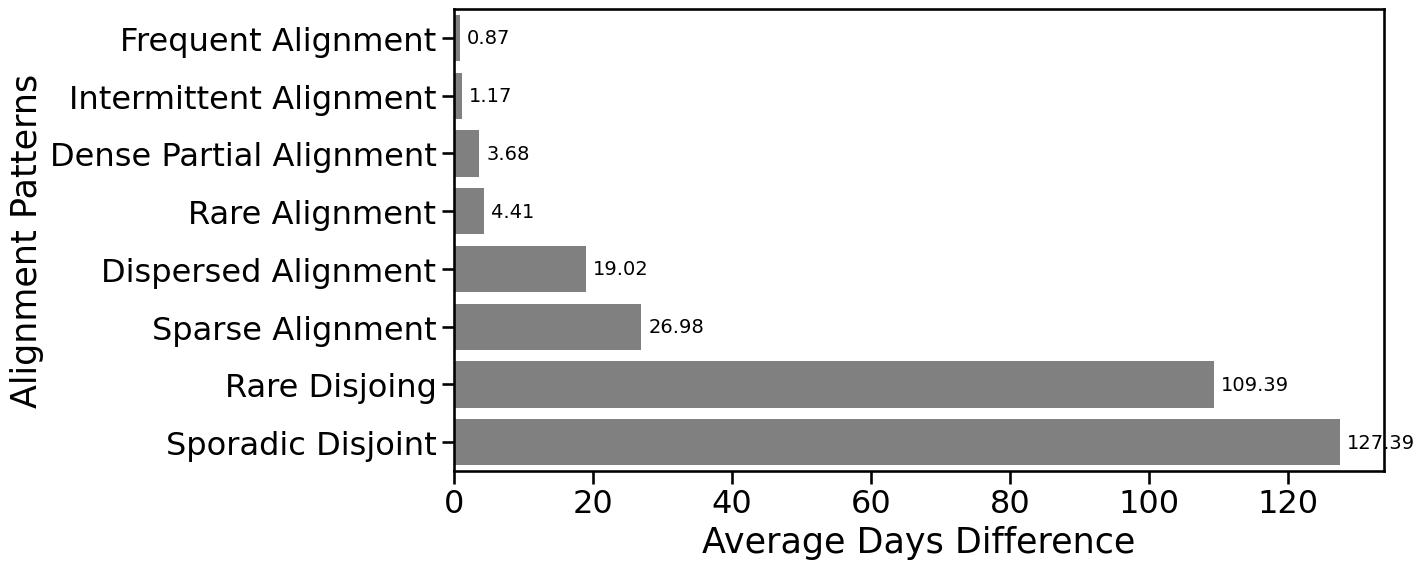

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set global font size to 14
plt.rcParams.update({'font.size': 14})

# Sort lag patterns by the mean days_difference
sorted_order = combined_days_diff.groupby('names')['days_difference'].mean().sort_values().index

# Create a horizontal bar plot with uniform grey color and sorted 'names'
plt.figure(figsize=(12, 6))
ax = sns.barplot(y='names', x='days_difference', data=combined_days_diff, estimator=lambda x: x.mean(), ci=None, color='grey', order=sorted_order)

# Rotate the y-axis labels for better visibility
plt.yticks(rotation=0)

# Add labels and title
plt.ylabel('Alignment Patterns')
plt.xlabel('Average Days Difference')
#plt.title('Average Days Difference by Lag Pattern')

# Annotate the bars with the actual values
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}', 
                (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha='left', va='center', 
                fontsize=14, color='black', 
                xytext=(5, 0), textcoords='offset points')

# Show the plot
plt.show()


In [4]:
# Test for normality (Shapiro-Wilk test)
from scipy.stats import shapiro

for group in combined_days_diff['Lagged'].unique():
    stat, p = shapiro(combined_days_diff[combined_days_diff['Lagged'] == group]['days_difference'])
    print(f"Shapiro test for {group}: p-value = {p:.4f}")

# Test for homogeneity of variances (Levene’s test)
from scipy.stats import levene

stat, p = levene(*[group["days_difference"].values for name, group in combined_days_diff.groupby("Lagged")])
print(f"Levene’s test p-value: {p:.4f}")


Shapiro test for GitHub First: p-value = 0.0000
Shapiro test for Simultaneous: p-value = 0.0000
Shapiro test for Hugging Face First: p-value = 0.0000
Levene’s test p-value: 0.0000


C:\Users\LabSystem\AppData\Local\Temp\ipykernel_3332\3058900135.py:21: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_gh = pd.read_csv(gh, encoding='latin1')


GitHub Spearman Correlation: 0.750

GitHub Regression Results:
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             236.9979     44.859      5.283      0.000     148.746     325.250
author_username     7.1130      0.311     22.908      0.000       6.502       7.724

Hugging Face Spearman Correlation: 0.539

Hugging Face Regression Results:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0470      8.026     -0.006      0.995     -15.836      15.742
author        14.0183      1.737      8.071      0.000      10.601      17.435


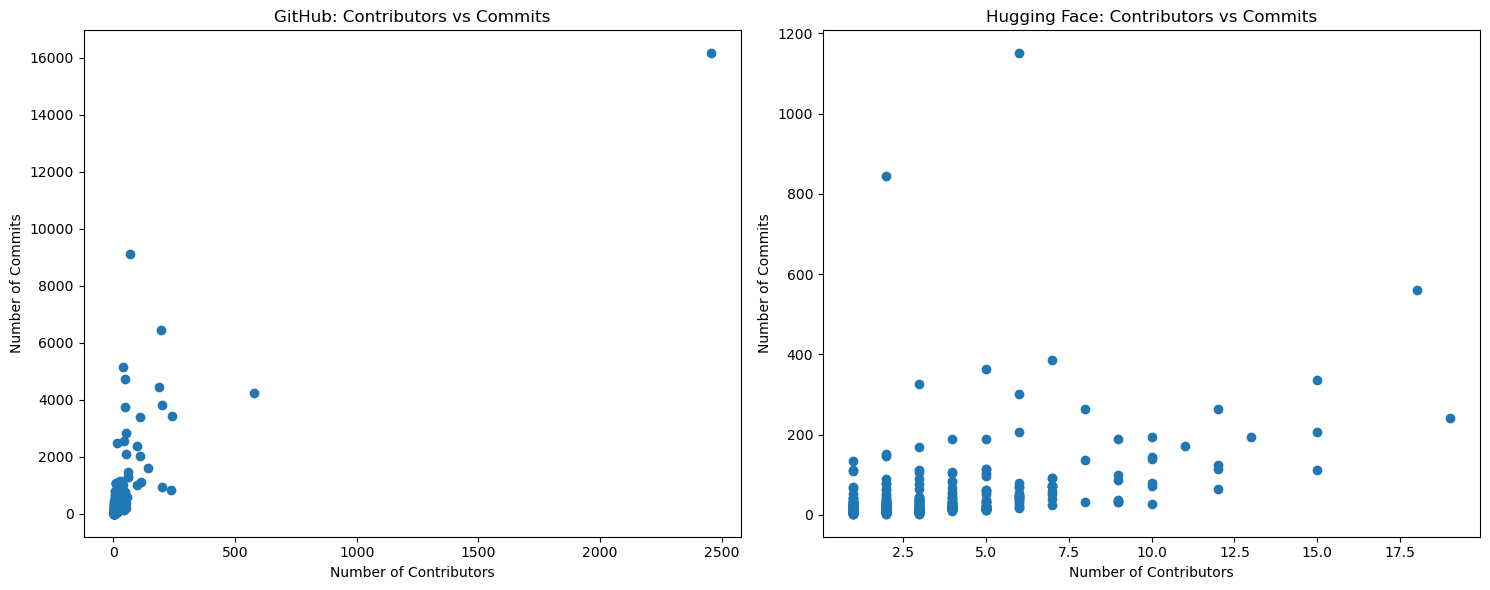

In [1]:
import pandas as pd
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statsmodels.api as sm


file = "../RQ3/RQ2_early_late_pattern.csv"
file2 = "../RQ3/grouped_data_RQ2.csv"
f2 = "../must_exclude_from_all_analysis.csv"

gh = "../RQ1/GH_data_devil.csv"
hf = "../RQ1/HF_data_devil.csv"

df_prime = pd.read_csv(file, encoding='latin1')
df2_prime = pd.read_csv(file2, encoding='latin1')
dfs2 = pd.read_csv(f2, encoding='latin1')

df_gh = pd.read_csv(gh, encoding='latin1')
df_hf = pd.read_csv(hf, encoding='latin1')

exclusion = list(dfs2['family'].unique())

#inclusion = list(main_df['family'].unique())

GH = df_gh[~df_gh['family'].isin(exclusion)]
HF = df_hf[~df_hf['family'].isin(exclusion)]

GH_data = GH[["family", "commit_message", "age_group", "author_username"]]
HF_data = HF[["family", "combined", "age_group", "author"]]


# Prepare data for correlation and regression analysis
gh_data_analysis = GH_data.groupby('family').agg({
    'author_username': 'nunique',
    'commit_message': 'count'
}).reset_index()

hf_data_analysis = HF_data.groupby('family').agg({
    'author': 'nunique',
    'combined': 'count'
}).reset_index()

# GitHub Correlation and Regression
gh_corr, _ = stats.spearmanr(gh_data_analysis['author_username'], gh_data_analysis['commit_message'])
print(f"GitHub Spearman Correlation: {gh_corr:.3f}")

X = sm.add_constant(gh_data_analysis['author_username']) #independent variable
y = gh_data_analysis['commit_message'] #dependent
gh_model = sm.OLS(y, X).fit()
print("\nGitHub Regression Results:")
print(gh_model.summary().tables[1])

# Hugging Face Correlation and Regression
hf_corr, _ = stats.spearmanr(hf_data_analysis['author'], hf_data_analysis['combined'])
print(f"\nHugging Face Spearman Correlation: {hf_corr:.3f}")

X = sm.add_constant(hf_data_analysis['author'])
y = hf_data_analysis['combined']
hf_model = sm.OLS(y, X).fit()
print("\nHugging Face Regression Results:")
print(hf_model.summary().tables[1])

# Scatter plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.scatter(gh_data_analysis['author_username'], gh_data_analysis['commit_message'])
ax1.set_xlabel('Number of Contributors')
ax1.set_ylabel('Number of Commits')
ax1.set_title('GitHub: Contributors vs Commits')

ax2.scatter(hf_data_analysis['author'], hf_data_analysis['combined'])
ax2.set_xlabel('Number of Contributors')
ax2.set_ylabel('Number of Commits')
ax2.set_title('Hugging Face: Contributors vs Commits')

plt.tight_layout()
plt.show()


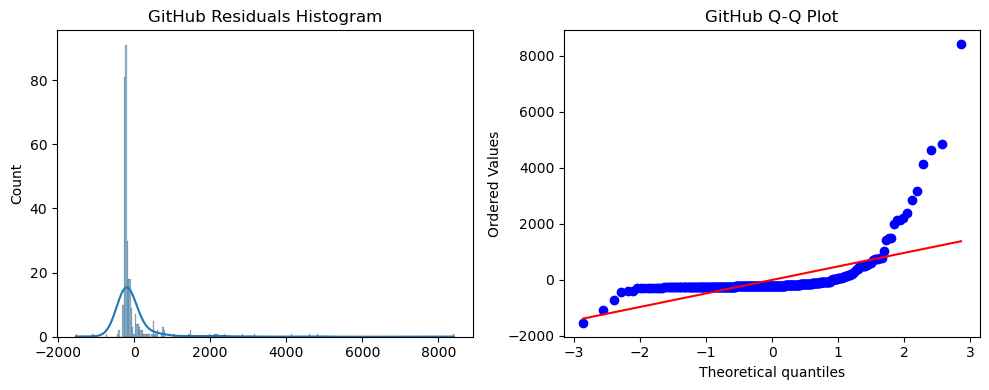

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# GitHub residuals
gh_resid = gh_model.resid

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(gh_resid, kde=True)
plt.title("GitHub Residuals Histogram")

plt.subplot(1, 2, 2)
stats.probplot(gh_resid, dist="norm", plot=plt)
plt.title("GitHub Q-Q Plot")

plt.tight_layout()
plt.show()

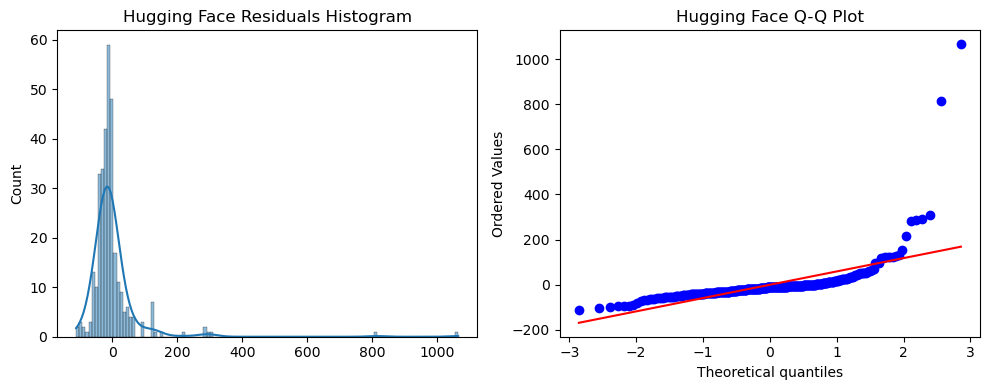

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# GitHub residuals
gh_resid = hf_model.resid

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(gh_resid, kde=True)
plt.title("Hugging Face Residuals Histogram")

plt.subplot(1, 2, 2)
stats.probplot(gh_resid, dist="norm", plot=plt)
plt.title("Hugging Face Q-Q Plot")

plt.tight_layout()
plt.show()



In [9]:
df1

,owner,family,family.1,model_name,pattern_names,average_age_days,names,pipeline_tag,Lagged,library_name,model_size_million_bytes,age_group
0,01-ai,01-ai_YI,01-ai_YI,9,Frequent Alignment Pattern,195.444444,Frequent Alignment,text-generation,No Lag,transformers,22721.538590,Intermediate-Families
1,1-800-BAD-CODE,1-800-BAD-CODE_XLM-ROBERTA,1-800-BAD-CODE_XLM-ROBERTA,1,Dispersed Alignment Pattern,68.000000,Dispersed Alignment,text2text-generation,Upstream First,generic,34388.917250,Recent-Families
2,42dot,42dot_42DOT-LLM,42dot_42DOT-LLM,1,Sparse Alignment Pattern,140.000000,Sparse Alignment,text-generation,No Lag,transformers,1439.271680,Intermediate-Families
3,af1tang,af1tang_PERSONALGPT,af1tang_PERSONALGPT,1,Rare Disjoing pattern,715.000000,Rare Disjoing,text-generation,Upstream First,transformers,117.000000,Matured-Families
4,ai-forever,ai-forever_gpt,ai-forever_gpt,5,Dispersed Alignment Pattern,915.200000,Dispersed Alignment,"text-generation,fill-mask",No Lag,transformers,368.981734,Matured-Families
...,...,...,...,...,...,...,...,...,...,...,...,...
320,wxjiao,wxjiao_alpaca,xlnet_xlnet,1,Rare Alignment Pattern,15.000000,Rare Alignment,text-generation,No Lag,transformers,7000.000000,Recent-Families
321,xlnet,xlnet_xlnet,yahma_llama,2,Dispersed Alignment Pattern,1300.500000,Dispersed Alignment,text-generation,No Lag,transformers,0.000000,Matured-Families
322,yahma,yahma_llama,yangheng_absa-model,1,Rare Disjoing pattern,0.000000,Rare Disjoing,text-generation,Upstream First,transformers,7000.000000,Recent-Families
323,yangheng,yangheng_absa-model,YituTech_conv-bert,1,Dispersed Alignment Pattern,774.000000,Dispersed Alignment,text-classification,Upstream First,transformers,184.424963,Matured-Families


In [6]:
pip install scikit-posthocs

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\labsystem\appdata\local\anaconda3\envs\mlearning\lib\site-packages\huggingface_hub-0.18.0-py3.8.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
